# Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.simplefilter(action='ignore', category=UserWarning)

# Load Data

In [ ]:
application_train = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/application_train.csv')
application_test = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/application_test.csv')

bureau = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/bureau.csv')
bureau_balance = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/bureau_balance.csv')
cc_balance = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/credit_card_balance.csv')
inst_payments = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/installments_payments.csv')

prev_application = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/previous_application.csv')

sample_submission = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/sample_submission.csv')
POS_CASH_balance = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/POS_CASH_balance.csv')

In [ ]:
application_train = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/application_train.csv')
# application_test = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/application_test.csv')

# Explore Data

In [ ]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
application_train.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_train.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [ ]:
application_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [ ]:
pd.options.display.max_rows = None
print('Feature Name                   Sum Null\n')
print(application_train.isnull().sum()[application_train.isnull().sum() > 0])

Feature Name                   Sum Null

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
CNT_FAM_MEMBERS                      2
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE      

In [ ]:
num_rows_with_null = application_train.isnull().any(axis=1).sum()
num_rows_with_null

np.int64(298909)

In [ ]:
application_train.duplicated().sum()

np.int64(0)

In [ ]:
len(application_train)

307511

## Missing Values

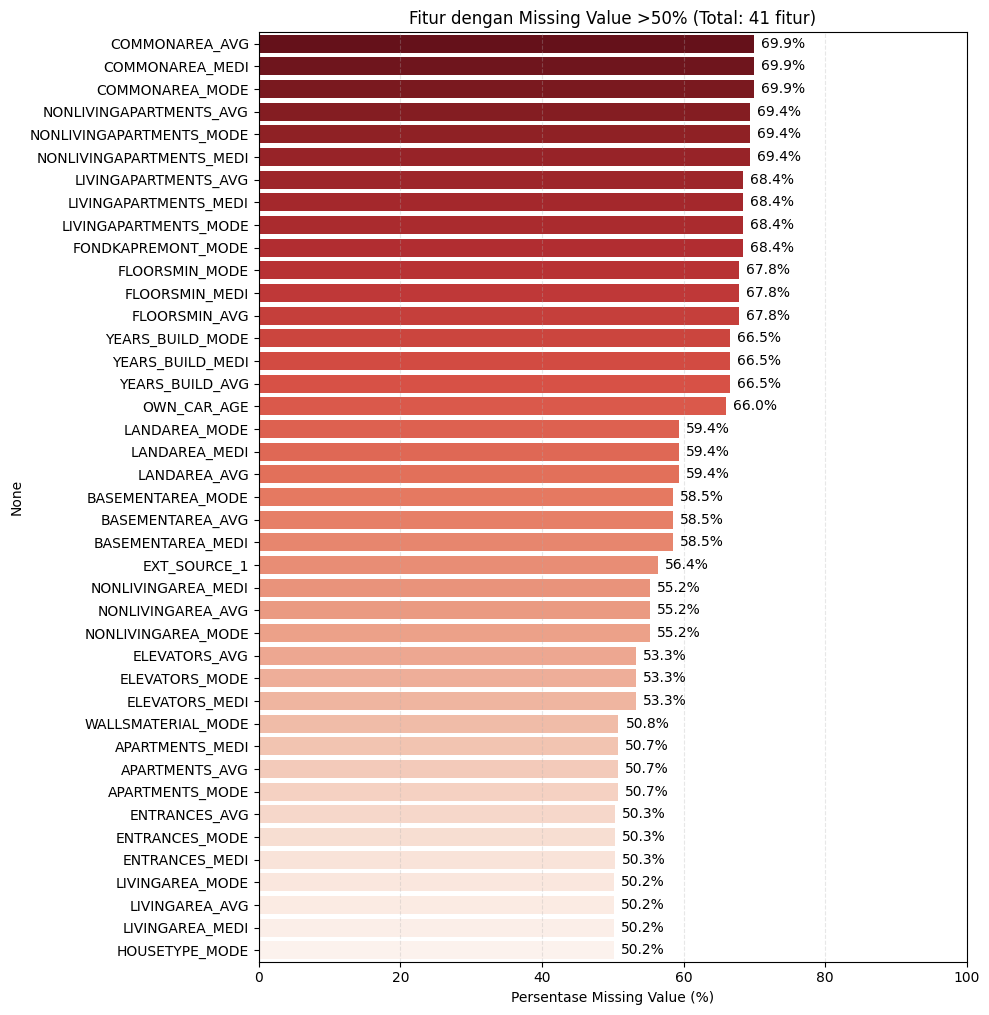

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)
missing_pct = (application_train.isnull().mean() * 100).round(1)

high_missing = missing_pct[missing_pct > 50].sort_values(ascending=False)

if not high_missing.empty:
    plt.figure(figsize=(10, 0.25 * len(high_missing)))
    ax = sns.barplot(
        x=high_missing.values,
        y=high_missing.index,
        palette='Reds_r',
        orient='h'
    )

    for i, pct in enumerate(high_missing.values):
        ax.text(
            pct + 1,
            i,
            f'{pct}%',
            va='center',
            fontsize=10
        )

    plt.title(f'Fitur dengan Missing Value >50% (Total: {len(high_missing)} fitur)')
    plt.xlabel('Persentase Missing Value (%)')
    plt.xlim(0, 100)
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada fitur dengan missing value >50%")

In [ ]:
threshold = 50
missing_percent = application_train.isnull().sum() / len(application_train) * 100

cols_to_drop = missing_percent[missing_percent > threshold].index

df_app = application_train.drop(columns=cols_to_drop, inplace=False)

In [ ]:
len(df_app.columns)

81

## Data Visualization

In [ ]:
app_target = df_app.pop('TARGET')

print(f"x shape: {df_app.shape}")
print(f"y shape: {app_target.shape}")

x shape: (307511, 80)
y shape: (307511,)


In [ ]:
df_app_copy = df_app.copy()

numeric = df_app_copy.select_dtypes(include='number').columns
category = df_app_copy.select_dtypes(include='object').columns

len(numeric), len(category)

(67, 13)

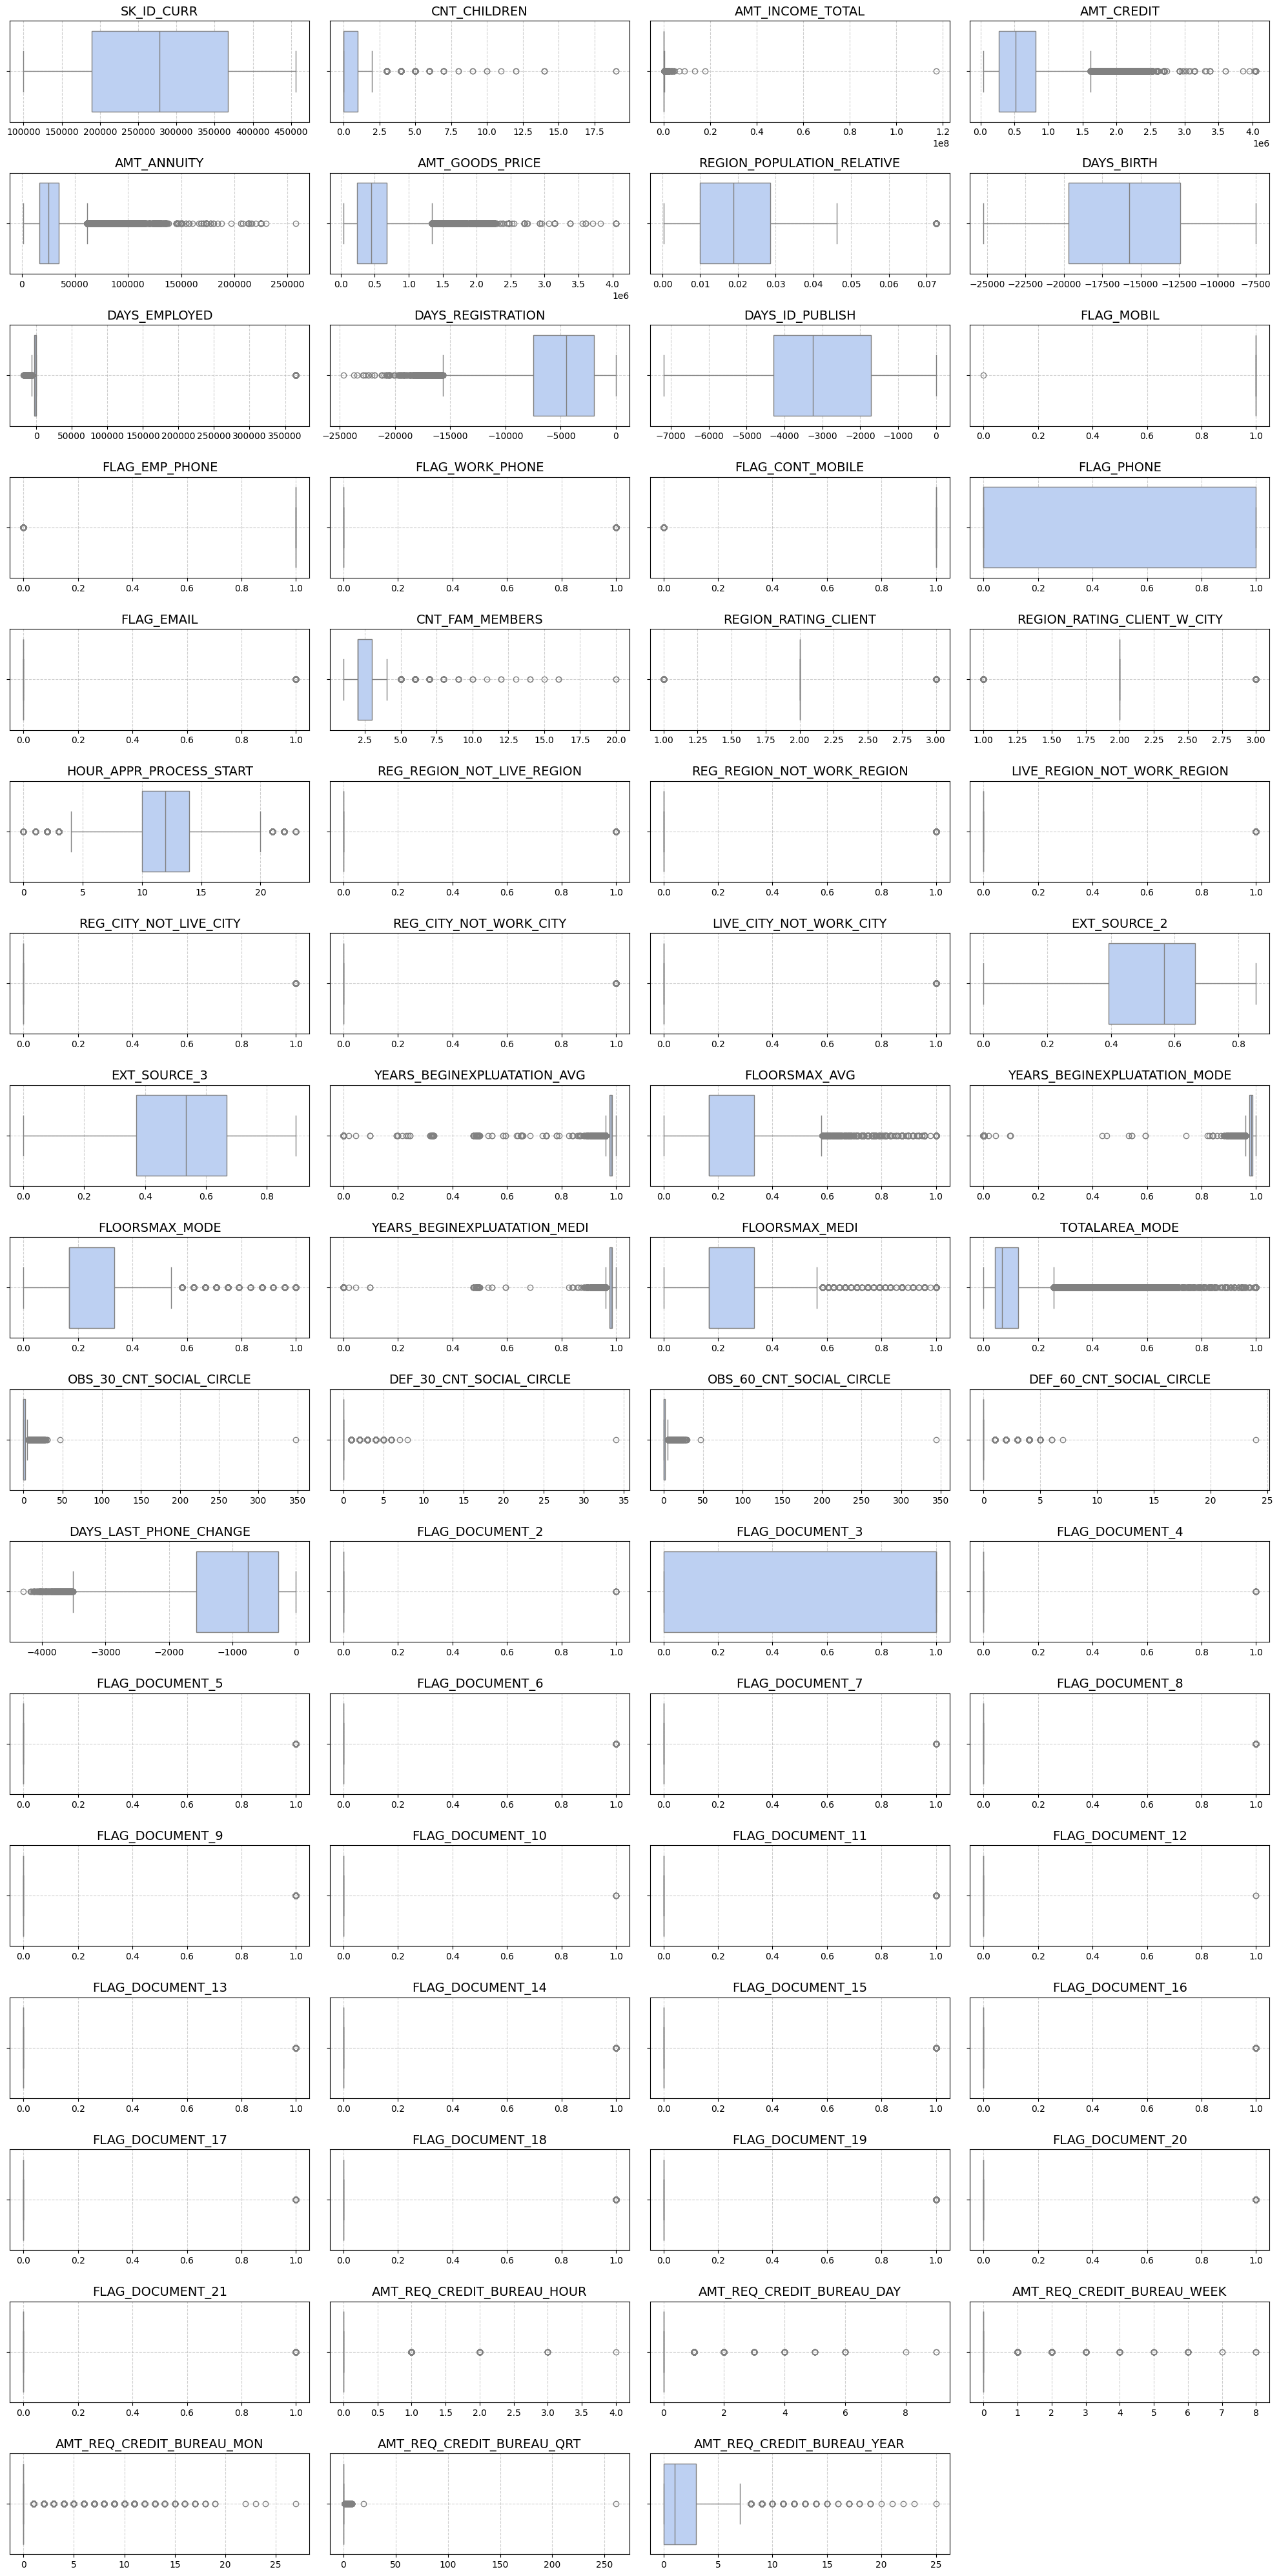

In [ ]:
plt.figure(figsize=(20, 40))  # Sesuaikan ukuran berdasarkan jumlah fitur
for i in range(len(numeric)):
    plt.subplot(len(numeric) // 4 + 1, 4, i + 1)  # Atur grid agar tetap rapi
    sns.boxplot(x=df_app[numeric[i]], color=sns.color_palette("coolwarm", 10)[3])  # Warna lebih menarik
    plt.title(numeric[i], fontsize=14)
    plt.xlabel('')
    plt.grid(True, linestyle="--", alpha=0.6)  # Tambahkan grid agar lebih jelas

plt.tight_layout()
plt.show()

In [ ]:
df_app[category].nunique()

,0
NAME_CONTRACT_TYPE,2
CODE_GENDER,3
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
NAME_TYPE_SUITE,7
NAME_INCOME_TYPE,8
NAME_EDUCATION_TYPE,5
NAME_FAMILY_STATUS,6
NAME_HOUSING_TYPE,6
OCCUPATION_TYPE,18


In [ ]:
df_cat_anl = df_app[category].drop(columns=['OCCUPATION_TYPE', 'ORGANIZATION_TYPE'])

In [ ]:
len(df_cat_anl.columns)

11

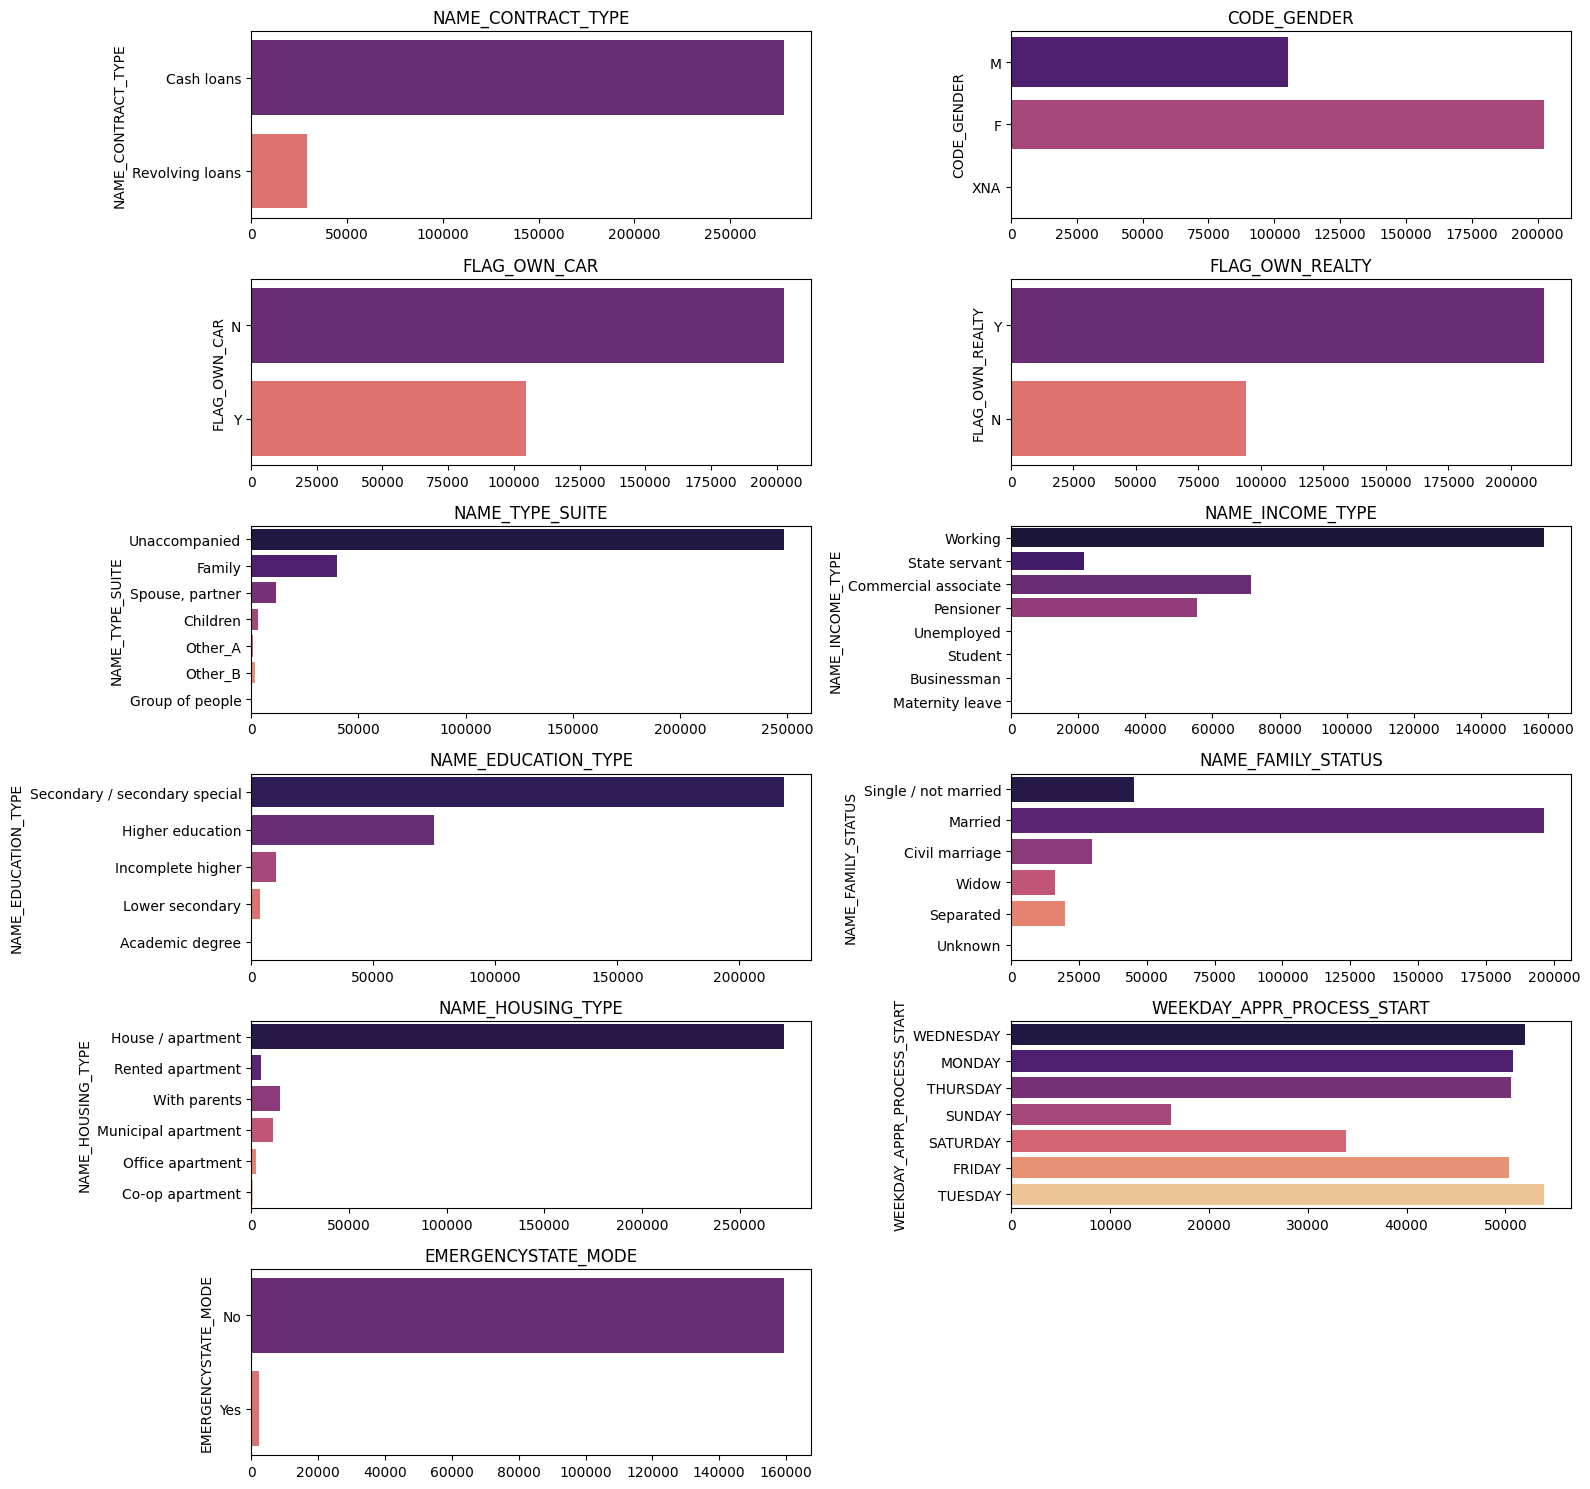

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
n_cols = 2
n_rows = math.ceil(len(df_cat_anl.columns) / n_cols)

plt.figure(figsize=(16, n_rows * 2.5))

for i, col in enumerate(df_cat_anl.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(y=df_app[col], palette='magma')
    plt.title(col)
    plt.xlabel('')
    plt.tight_layout()

plt.show()


In [ ]:
list_col = {
    "NAME_TYPE_SUITE - Group of people": (df_app['NAME_TYPE_SUITE'] == "Group of people").sum(),
    "NAME_EDUCATION_TYPE - Academic degree": (df_app['NAME_EDUCATION_TYPE'] == "Academic degree").sum(),
    "NAME_INCOME_TYPE - Maternity leave": (df_app['NAME_INCOME_TYPE'] == "Maternity leave").sum(),
    "NAME_INCOME_TYPE - Businessman": (df_app['NAME_INCOME_TYPE'] == "Businessman").sum(),
    "NAME_INCOME_TYPE - Student": (df_app['NAME_INCOME_TYPE'] == "Student").sum(),
    "NAME_INCOME_TYPE - Unemployed": (df_app['NAME_INCOME_TYPE'] == "Unemployed").sum(),
    "NAME_FAMILY_STATUS - Unknown": (df_app['NAME_FAMILY_STATUS'] == "Unknown").sum(),
}

for key, value in list_col.items():
    print(f"{key}: {value}")

NAME_TYPE_SUITE - Group of people: 271
NAME_EDUCATION_TYPE - Academic degree: 164
NAME_INCOME_TYPE - Maternity leave: 5
NAME_INCOME_TYPE - Businessman: 10
NAME_INCOME_TYPE - Student: 18
NAME_INCOME_TYPE - Unemployed: 22
NAME_FAMILY_STATUS - Unknown: 2


In [ ]:
# Gabungkan kembali fitur dengan target
df_app_target = pd.concat([df_app, app_target], axis=1)

# Hapus kolom dengan 0 variance agar tidak menyebabkan warning/error
numeric_filtered = [col for col in numeric if df_app_target[col].nunique() > 1]

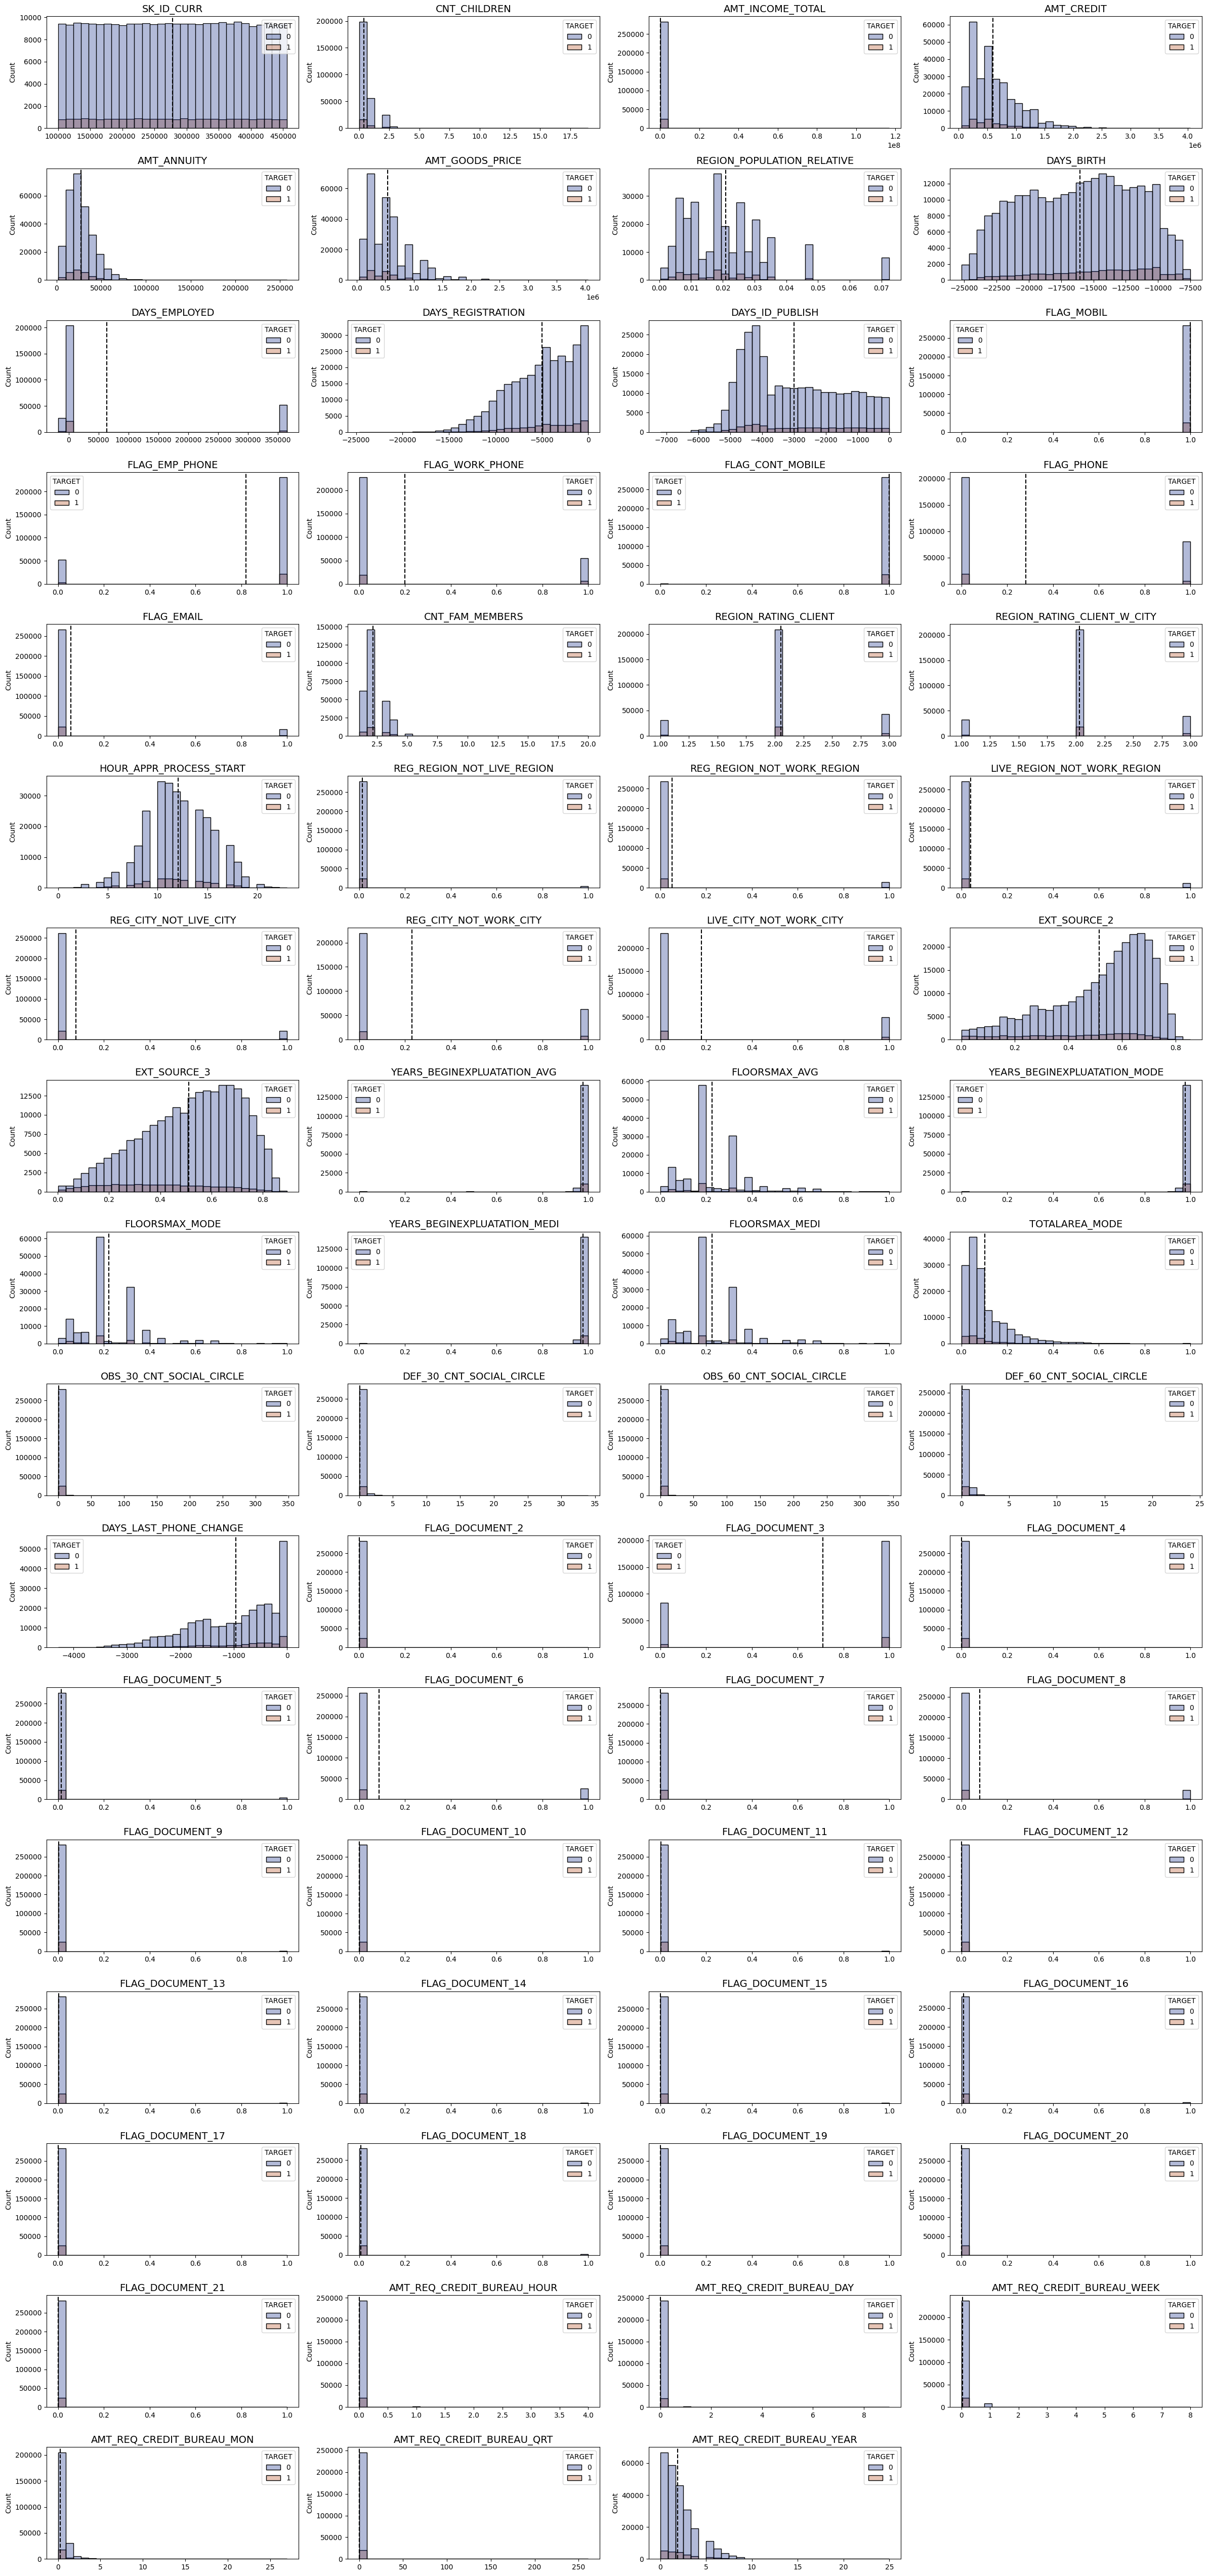

In [ ]:
warnings.simplefilter(action='ignore', category=UserWarning)

n_cols = 4
n_rows = (len(numeric_filtered) // n_cols) + 1

plt.figure(figsize=(24, n_rows * 3))

for i, col in enumerate(numeric_filtered):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(data=df_app_target, x=col, hue='TARGET', kde=False, bins=30, palette='dark', alpha=0.3)
    plt.axvline(df_app_target[col].mean(), color='black', linestyle='--', linewidth=1.5)
    plt.title(col, fontsize=14)
    plt.xlabel('')
    plt.tight_layout()

plt.show()

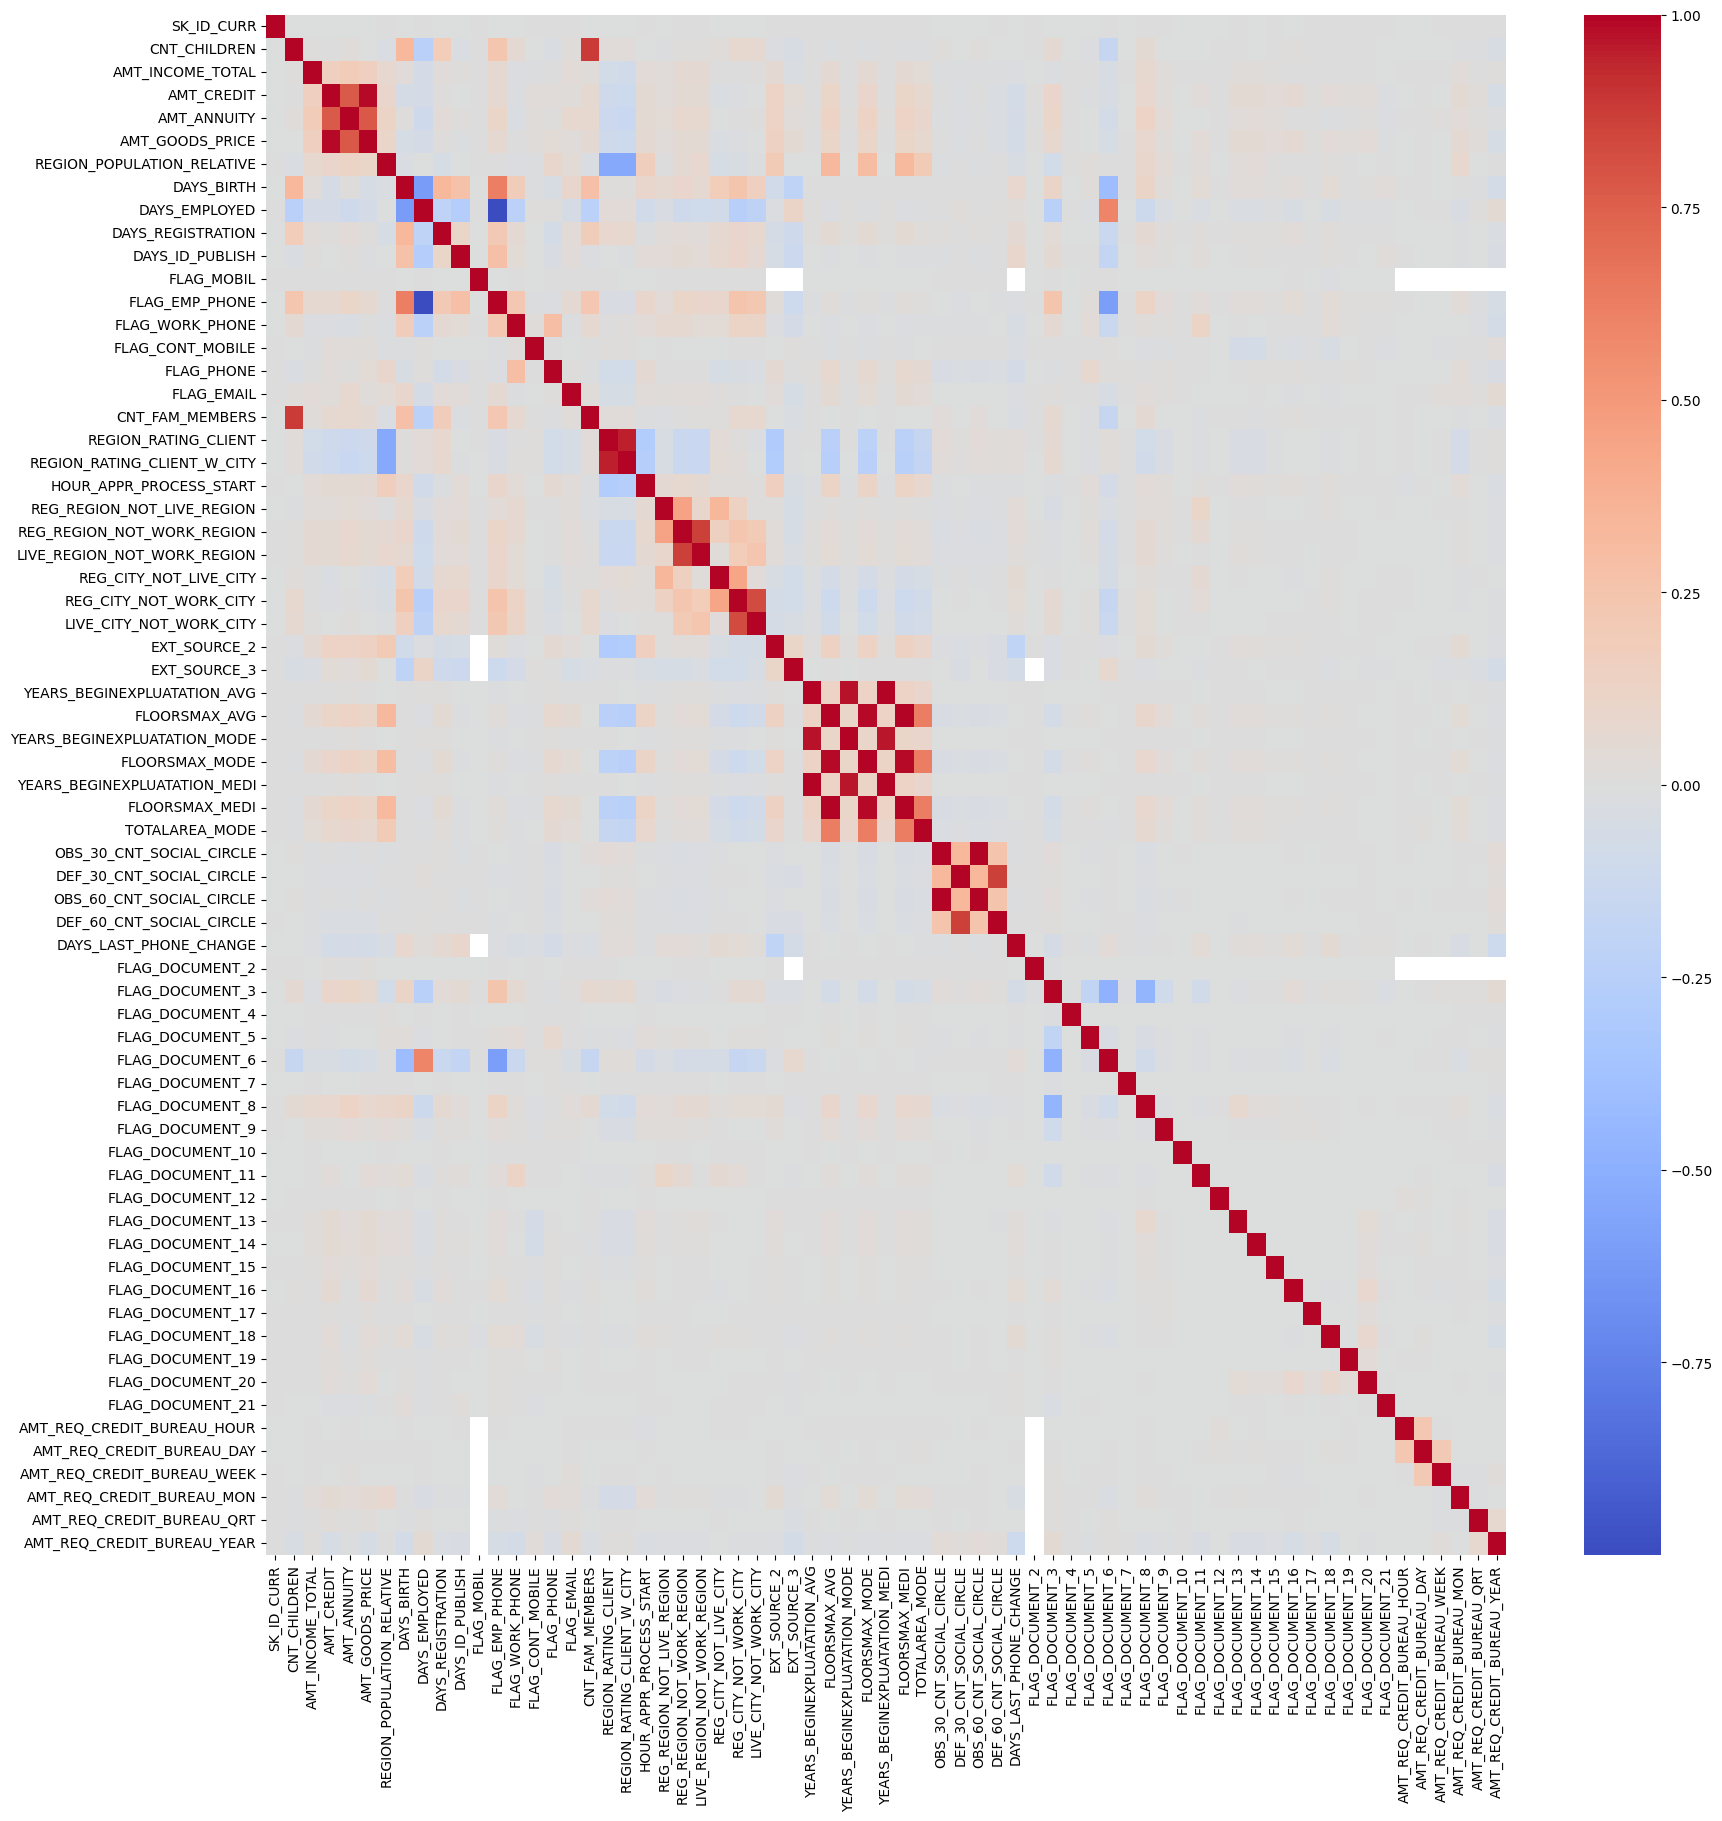

In [ ]:
plt.figure(figsize =(20,20))
sns.heatmap(df_app[numeric].corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.show()

# Pre processing

In [ ]:
data = df_app.copy()

In [ ]:
data = data.drop(columns=['SK_ID_CURR', 'ORGANIZATION_TYPE'], axis=1)

In [ ]:
len(data.columns)

78

## Handling missing value

In [ ]:
columns_with_null = data.columns[data.isnull().any()].tolist()

missing_data = pd.DataFrame({
    'Column Name': columns_with_null,
    'Missing Values': [data[col].isnull().sum() for col in columns_with_null],
    'Data Type': [data[col].dtype for col in columns_with_null]
})

missing_data

,Column Name,Missing Values,Data Type
0,AMT_ANNUITY,12,float64
1,AMT_GOODS_PRICE,278,float64
2,NAME_TYPE_SUITE,1292,object
3,OCCUPATION_TYPE,96391,object
4,CNT_FAM_MEMBERS,2,float64
5,EXT_SOURCE_2,660,float64
6,EXT_SOURCE_3,60965,float64
7,YEARS_BEGINEXPLUATATION_AVG,150007,float64
8,FLOORSMAX_AVG,153020,float64
9,YEARS_BEGINEXPLUATATION_MODE,150007,float64


In [ ]:
numeric = data.select_dtypes(include='number').columns
category = data.select_dtypes(include='object').columns

data[numeric] = data[numeric].apply(lambda x: x.fillna(x.median()))
data[category] = data[category].apply(lambda x: x.fillna(x.mode()[0]))

In [ ]:
data.isnull().sum().sum()

np.int64(0)

## Handling Outlier Variables

In [ ]:
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
data['NAME_INCOME_TYPE'].replace(
    {"Maternity leave": "Unemployed", "Student": "Unemployed", "Businessman": "Working"},
    inplace=True
)

data['NAME_FAMILY_STATUS'].replace(
    {"Unknown": "Married"},
    inplace=True
)

data['CODE_GENDER'].replace(
    {"XNA": "F"},
    inplace=True
)

## Feature Engineering

In [ ]:
data['AGE'] = round((data['DAYS_BIRTH'] / 365).abs(), 0).astype(int)
data['YEAR_EMP'] = round((data['DAYS_EMPLOYED'] / 365).abs(), 0).astype(int)
data['YEAR_REGISTERED'] = round((data['DAYS_REGISTRATION'] / 365).abs(), 0).astype(int)
data['YEAR_PUBLISHED'] = round((data['DAYS_ID_PUBLISH'] / 365).abs(), 0).astype(int)
data['YEAR_LAST_PHONE_CHANGE'] = round((data['DAYS_LAST_PHONE_CHANGE'] / 365).abs(), 0).astype(int)

data['TOTAL_CREDIT_INQUIRIES'] = (
    data['AMT_REQ_CREDIT_BUREAU_HOUR'] +
    data['AMT_REQ_CREDIT_BUREAU_DAY'] +
    data['AMT_REQ_CREDIT_BUREAU_WEEK'] +
    data['AMT_REQ_CREDIT_BUREAU_MON'] +
    data['AMT_REQ_CREDIT_BUREAU_QRT'] +
    data['AMT_REQ_CREDIT_BUREAU_YEAR']
)

data = data.drop([
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
], axis=1)

In [ ]:
len(data.columns)

73

## Encoding

In [ ]:
data[category].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,No
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,No


In [ ]:
columns_to_check = [
    "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
    "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "EMERGENCYSTATE_MODE"
]

for col in columns_to_check:
    print(f"{col}: {data[col].unique()}")

NAME_CONTRACT_TYPE: ['Cash loans' 'Revolving loans']
CODE_GENDER: ['M' 'F']
FLAG_OWN_CAR: ['N' 'Y']
FLAG_OWN_REALTY: ['Y' 'N']
NAME_TYPE_SUITE: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
NAME_INCOME_TYPE: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed']
NAME_EDUCATION_TYPE: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS: ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated']
NAME_HOUSING_TYPE: ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE: ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Drivers' 'Sales staff'
 'Cleaning staff' 'Cooking staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'High skill tech staff' 'Waiters/barmen staff'
 'Low-skill Laborers' 'Realty agents' 'Secretaries' 'IT staff' 'HR staff']
WEE

In [ ]:
data['CODE_GENDER'] = data['CODE_GENDER'].map({'F':0, 'M':1,'XNA':0})
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].map({'N':0, 'Y':1})
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].map({'N':0, 'Y':1})

In [ ]:
data.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTA

## Copy Data for Feature Selection

In [ ]:
data2 = pd.concat([data, app_target], axis=1)
data3 = data2.copy()

In [ ]:
data3.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTA

In [ ]:
category = data.select_dtypes(include='object').columns
numeric = data.select_dtypes(include='number').columns

## Feature Selection

In [ ]:
feature_selected = []
def woe(df, feature_name):
    # make probability analysis
    name = feature_name

    feature_name = df.groupby(feature_name).agg(num_observation=('TARGET','count'),
                                                good_loan_prob=('TARGET','mean')).reset_index()

    # find grade proportion
    feature_name['grade_proportion'] = feature_name['num_observation']/feature_name['num_observation'].sum()

    # find number of good loan
    feature_name['num_good_loan'] = feature_name['grade_proportion'] * feature_name['num_observation']

    # find number of bad loan
    feature_name['num_bad_loan'] = (1-feature_name['grade_proportion']) * feature_name['num_observation']

    # find good loan proportion
    feature_name['good_loan_prop'] = feature_name['num_good_loan'] / feature_name['num_good_loan'].sum()

    # find bad loan proportion
    feature_name['bad_loan_prop'] = feature_name['num_bad_loan'] / feature_name['num_bad_loan'].sum()

    # find Weight of Evidence
    feature_name['weight_of_evidence'] = np.log(feature_name['good_loan_prop'] / feature_name['bad_loan_prop'])

    # sort values by weight of evidence
    feature_name = feature_name.sort_values('weight_of_evidence').reset_index(drop=True)

    # find difference each good loan proportion
    feature_name['good_loan_prop_diff'] = feature_name['good_loan_prop'].diff().abs()

    # find difference each weight of evidence
    feature_name['diff_woe'] = feature_name['weight_of_evidence'].diff().abs()

    # find information value
    feature_name['information_value'] = (feature_name['good_loan_prop']-feature_name['bad_loan_prop']) * feature_name['weight_of_evidence']
    feature_name['information_value'] = feature_name['information_value'].sum()

    if (feature_name['information_value'].sum()/len(df[name].unique()) >= 0.1) & (feature_name['information_value'].sum()/len(df[name].unique()) < 1):
        feature_selected.append(name)

    return feature_name

In [ ]:
numeric

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMEN

In [ ]:
unique_counts = data3[numeric].nunique()
selected_features = unique_counts[unique_counts > 5].index

print("Fitur dengan minimal 6 nilai unik:")
print(selected_features)

Fitur dengan minimal 6 nilai unik:
Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AGE',
       'YEAR_EMP', 'YEAR_REGISTERED', 'YEAR_PUBLISHED',
       'YEAR_LAST_PHONE_CHANGE', 'TOTAL_CREDIT_INQUIRIES'],
      dtype='object')


### AMT_CREDIT

In [ ]:
data3['AMT_CREDIT'].describe()

,AMT_CREDIT
count,3.075110e+05
mean,5.990260e+05
std,4.024908e+05
min,4.500000e+04
25%,2.700000e+05
50%,5.135310e+05
75%,8.086500e+05
max,4.050000e+06


In [ ]:
data3['AMT_CREDIT_Binned'] = np.where((data2['AMT_CREDIT']>0)&(data2['AMT_CREDIT']<200000),'0-200k',
                      np.where((data2['AMT_CREDIT']>200000)&(data2['AMT_CREDIT']<=400000),'200k-400k',
                      np.where((data2['AMT_CREDIT']>400000)&(data2['AMT_CREDIT']<=600000),'400k-600k',
                      np.where((data2['AMT_CREDIT']>600000)&(data2['AMT_CREDIT']<=800000),'600k-800k',
                      np.where((data2['AMT_CREDIT']>800000)&(data2['AMT_CREDIT']<=1000000),'800k-1m','>1m')))))

data3['AMT_CREDIT_Binned'].value_counts()

,count
AMT_CREDIT_Binned,
200k-400k,81151
400k-600k,66270
>1m,49985
600k-800k,43242
0-200k,36144
800k-1m,30719


In [ ]:
woe(data3, 'AMT_CREDIT_Binned')

,AMT_CREDIT_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,800k-1m,30719,0.071682,0.099896,3068.693351,27650.306649,0.053630,0.110472,-0.722653,NaN,NaN,0.156761
1,0-200k,36144,0.068891,0.117537,4248.266683,31895.733317,0.074245,0.127434,-0.540229,0.020615,0.182424,0.156761
2,600k-800k,43242,0.082397,0.140619,6080.662363,37161.337637,0.106269,0.148472,-0.334423,0.032024,0.205806,0.156761
3,>1m,49985,0.058658,0.162547,8124.913336,41860.086664,0.141996,0.167245,-0.163665,0.035726,0.170758,0.156761
4,400k-600k,66270,0.101011,0.215504,14281.482288,51988.517712,0.249591,0.207712,0.183673,0.107596,0.347339,0.156761
5,200k-400k,81151,0.085569,0.263896,21415.444654,59735.555346,0.374269,0.238664,0.449917,0.124677,0.266244,0.156761


### CNT_CHILDREN

In [ ]:
bins = [-1, 0, 2, 4, 6, 10, 20]  # Rentang kategori
labels = ['No Child', '1-2 Children', '3-4 Children', '5-6 Children', '7-10 Children', 'More than 10']

data3['CNT_CHILDREN_Binned'] = pd.cut(data3['CNT_CHILDREN'], bins=bins, labels=labels)

print(data3[['CNT_CHILDREN', 'CNT_CHILDREN_Binned']].head())

   CNT_CHILDREN CNT_CHILDREN_Binned
0             0            No Child
1             0            No Child
2             0            No Child
3             0            No Child
4             0            No Child


In [ ]:
woe(data3, 'CNT_CHILDREN_Binned')

,CNT_CHILDREN_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,More than 10,8,0.125000,0.000026,0.000208,7.999792,1.182499e-09,0.000061,-10.848223,NaN,NaN,0.757717
1,7-10 Children,13,0.153846,0.000042,0.000550,12.999450,3.122537e-09,0.000099,-10.362699,1.940038e-09,0.485524,0.757717
2,5-6 Children,105,0.123810,0.000341,0.035852,104.964148,2.037040e-07,0.000798,-8.273389,2.005814e-07,2.089310,0.757717
3,3-4 Children,4146,0.099614,0.013482,55.898215,4090.101785,3.175993e-04,0.031101,-4.584217,3.173956e-04,3.689172,0.757717
4,1-2 Children,87868,0.088622,0.285739,25107.347132,62760.652868,1.426535e-01,0.477236,-1.207592,1.423359e-01,3.376625,0.757717
5,No Child,215371,0.077118,0.700368,150839.051744,64531.948256,8.570287e-01,0.490705,0.557628,7.143752e-01,1.765221,0.757717


### AMT_INCOME_TOTAL

In [ ]:
# fine classing = 4 class
data3['AMT_INCOME_TOTAL_Binned'] = np.where((data2['AMT_INCOME_TOTAL'] > 0)&(data2['AMT_INCOME_TOTAL'] <= 100000),'0-100k',
                               np.where((data2['AMT_INCOME_TOTAL'] > 100000)&(data2['AMT_INCOME_TOTAL'] <= 150000), '100k-150k',
                               np.where((data2['AMT_INCOME_TOTAL'] > 150000)&(data2['AMT_INCOME_TOTAL'] <= 200000), '150k-200k',
                               np.where((data2['AMT_INCOME_TOTAL'] > 200000)&(data2['AMT_INCOME_TOTAL'] <= 250000), '200k-250k',
                               np.where((data2['AMT_INCOME_TOTAL'] > 250000)&(data2['AMT_INCOME_TOTAL'] <= 300000), '250k-300k','>300k')))))

data3['AMT_INCOME_TOTAL_Binned'].value_counts()

,count
AMT_INCOME_TOTAL_Binned,
100k-150k,91591
150k-200k,64307
0-100k,63698
200k-250k,48137
>300k,22739
250k-300k,17039


In [ ]:
woe(data3, 'AMT_INCOME_TOTAL_Binned')

,AMT_INCOME_TOTAL_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,250k-300k,17039,0.070016,0.055409,944.120766,16094.879234,0.014733,0.066118,-1.501365,NaN,NaN,0.24331
1,>300k,22739,0.059501,0.073945,1681.442683,21057.557317,0.026238,0.086504,-1.192970,0.011506,0.308395,0.24331
2,200k-250k,48137,0.077446,0.156537,7535.245142,40601.754858,0.117585,0.166792,-0.349582,0.091347,0.843387,0.24331
3,0-100k,63698,0.082028,0.207141,13194.439236,50503.560764,0.205895,0.207468,-0.007611,0.088310,0.341972,0.24331
4,150k-200k,64307,0.084470,0.209121,13447.942509,50859.057491,0.209851,0.208929,0.004406,0.003956,0.012016,0.24331
5,100k-150k,91591,0.086188,0.297846,27280.036425,64310.963575,0.425697,0.264189,0.477063,0.215846,0.472657,0.24331


### AMT_ANNUITY

In [ ]:
data3['AMT_ANNUITY_Binned'] =  np.where(data2['AMT_ANNUITY']<=20000,'20k',
                          np.where((data2['AMT_ANNUITY']>20000)&(data2['AMT_ANNUITY']<=30000),'30k',
                          np.where((data2['AMT_ANNUITY']>30000)&(data2['AMT_ANNUITY']<=46000),'46k','>46k')))

data3['AMT_ANNUITY_Binned'].value_counts()

,count
AMT_ANNUITY_Binned,
20k,106505
30k,92478
46k,77896
>46k,30632


In [ ]:
woe(data3, 'AMT_ANNUITY_Binned')

,AMT_ANNUITY_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>46k,30632,0.057848,0.099613,3051.336128,27580.663872,0.034880,0.125350,-1.279205,NaN,NaN,0.154
1,46k,77896,0.086153,0.253311,19731.934194,58164.065806,0.225555,0.264347,-0.158699,0.190675,1.120506,0.154
2,30k,92478,0.089297,0.300731,27810.974190,64667.025810,0.317906,0.293902,0.078509,0.092351,0.237209,0.154
3,20k,106505,0.075903,0.346345,36887.509796,69617.490204,0.421659,0.316401,0.287187,0.103753,0.208678,0.154


### AMT_GOODS_PRICE

In [ ]:
data3['AMT_GOODS_PRICE_Binned'] = np.where(data2['AMT_GOODS_PRICE']<=300000,'300k',
                              np.where((data2['AMT_GOODS_PRICE']>300000)&(data2['AMT_GOODS_PRICE']<=600000),'600k',
                              np.where((data2['AMT_GOODS_PRICE']>600000)&(data2['AMT_GOODS_PRICE']<=900000),'900k','1m')))

data3['AMT_GOODS_PRICE_Binned'].value_counts()

,count
AMT_GOODS_PRICE_Binned,
300k,104426
600k,91587
900k,69618
1m,41880


In [ ]:
woe(data3, 'AMT_GOODS_PRICE_Binned')

,AMT_GOODS_PRICE_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1m,41880,0.051122,0.136190,5703.647674,36176.352326,0.067736,0.162003,-0.871990,NaN,NaN,0.134953
1,900k,69618,0.074837,0.226392,15760.951394,53857.048606,0.187176,0.241179,-0.253488,0.119440,0.618502,0.134953
2,600k,91587,0.099698,0.297833,27277.653707,64309.346293,0.323948,0.287986,0.117673,0.136772,0.371161,0.134953
3,300k,104426,0.079894,0.339585,35461.461463,68964.538537,0.421139,0.308832,0.310164,0.097191,0.192491,0.134953


### REGION_POPULATION_RELATIVE

In [ ]:
data3['REGION_POPULATION_RELATIVE'].min()

0.00029

In [ ]:
# fine classing = 4 class
data3['REGION_POPULATION_RELATIVE_Binned'] = pd.cut(data2['REGION_POPULATION_RELATIVE'], 4)
data3['REGION_POPULATION_RELATIVE_Binned'].value_counts()

,count
REGION_POPULATION_RELATIVE_Binned,
"(0.0183, 0.0364]",149314
"(0.000218, 0.0183]",136343
"(0.0364, 0.0545]",13442
"(0.0545, 0.0725]",8412


In [ ]:
data3['REGION_POPULATION_RELATIVE_Binned'].unique()

[(0.0183, 0.0364], (0.000218, 0.0183], (0.0364, 0.0545], (0.0545, 0.0725]]
Categories (4, interval[float64, right]): [(0.000218, 0.0183] < (0.0183, 0.0364] < (0.0364, 0.0545] <
                                           (0.0545, 0.0725]]

In [ ]:
woe(data3, 'REGION_POPULATION_RELATIVE_Binned')

,REGION_POPULATION_RELATIVE_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,"(0.0545, 0.0725]",8412,0.039705,0.027355,230.111261,8181.888739,0.001720,0.047092,-3.309662,NaN,NaN,0.367548
1,"(0.0364, 0.0545]",13442,0.049323,0.043712,587.580165,12854.419835,0.004392,0.073986,-2.823977,0.002672,0.485685,0.367548
2,"(0.000218, 0.0183]",136343,0.086891,0.443376,60451.215238,75891.784762,0.451906,0.436808,0.033981,0.447514,2.857959,0.367548
3,"(0.0183, 0.0364]",149314,0.080240,0.485557,72500.400298,76813.599702,0.541981,0.442114,0.203663,0.090074,0.169682,0.367548


### CNT_FAM_MEMBERS

In [ ]:
data3['CNT_FAM_MEMBERS_Binned'] = np.where(data2['CNT_FAM_MEMBERS'] == 2, '2',
                              np.where((data2['CNT_FAM_MEMBERS']>2)&(data2['CNT_FAM_MEMBERS']<=4),'2-4',
                              np.where((data2['CNT_FAM_MEMBERS']>4)&(data2['CNT_FAM_MEMBERS']<=6),'4-6','>6')))

data3['CNT_FAM_MEMBERS_Binned'].value_counts()

,count
CNT_FAM_MEMBERS_Binned,
2,158359
2-4,77298
>6,67968
4-6,3886


In [ ]:
woe(data3, 'CNT_FAM_MEMBERS_Binned')

,CNT_FAM_MEMBERS_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,4-6,3886,0.098302,0.012637,49.107173,3836.892827,0.000423,0.020040,-3.857779,NaN,NaN,0.435982
1,>6,67968,0.083716,0.221026,15022.711461,52945.288539,0.129448,0.276536,-0.759062,0.129025,3.098717,0.435982
2,2-4,77298,0.087247,0.251367,19430.136821,57867.863179,0.167426,0.302247,-0.590703,0.037978,0.168359,0.435982
3,2,158359,0.075834,0.514970,81550.165298,76808.834702,0.702703,0.401177,0.560532,0.535277,1.151236,0.435982


### HOUR_APPR_PROCESS_START

In [ ]:
data3['HOUR_APPR_PROCESS_START_Binned'] = pd.cut(data2['HOUR_APPR_PROCESS_START'], 4)
data3['HOUR_APPR_PROCESS_START_Binned'].value_counts()

,count
HOUR_APPR_PROCESS_START_Binned,
"(11.5, 17.25]",152998
"(5.75, 11.5]",132435
"(17.25, 23.0]",14689
"(-0.023, 5.75]",7389


In [ ]:
data3['HOUR_APPR_PROCESS_START_Binned'].unique()

[(5.75, 11.5], (11.5, 17.25], (17.25, 23.0], (-0.023, 5.75]]
Categories (4, interval[float64, right]): [(-0.023, 5.75] < (5.75, 11.5] < (11.5, 17.25] <
                                           (17.25, 23.0]]

In [ ]:
woe(data3, 'HOUR_APPR_PROCESS_START_Binned')

,HOUR_APPR_PROCESS_START_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,"(-0.023, 5.75]",7389,0.095818,0.024028,177.545912,7211.454088,0.001325,0.041571,-3.446282,NaN,NaN,0.376016
1,"(17.25, 23.0]",14689,0.069984,0.047767,701.655294,13987.344706,0.005235,0.080631,-2.734551,0.003910,0.711731,0.376016
2,"(5.75, 11.5]",132435,0.084676,0.430668,57035.453122,75399.546878,0.425521,0.434644,-0.021213,0.420286,2.713338,0.376016
3,"(11.5, 17.25]",152998,0.077615,0.497537,76122.115970,76875.884030,0.567920,0.443154,0.248062,0.142399,0.269275,0.376016


### EXT_SOURCE_2

In [ ]:
data3['EXT_SOURCE_2_Binned'] = pd.cut(data2['EXT_SOURCE_2'], 4)
data3['EXT_SOURCE_2_Binned'].value_counts()

,count
EXT_SOURCE_2_Binned,
"(0.427, 0.641]",123828
"(0.641, 0.855]",95940
"(0.214, 0.427]",57362
"(-0.000855, 0.214]",30381


In [ ]:
data3['EXT_SOURCE_2_Binned'].unique()

[(0.214, 0.427], (0.427, 0.641], (0.641, 0.855], (-0.000855, 0.214]]
Categories (4, interval[float64, right]): [(-0.000855, 0.214] < (0.214, 0.427] < (0.427, 0.641] <
                                           (0.641, 0.855]]

In [ ]:
woe(data3, 'EXT_SOURCE_2_Binned')

,EXT_SOURCE_2_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,"(-0.000855, 0.214]",30381,0.184194,0.098796,3001.535428,27379.464572,0.032103,0.127933,-1.382552,NaN,NaN,0.28112
1,"(0.214, 0.427]",57362,0.111607,0.186536,10700.101928,46661.898072,0.114444,0.218032,-0.644558,0.082341,0.737995,0.28112
2,"(0.641, 0.855]",95940,0.040848,0.311989,29932.209254,66007.790746,0.320142,0.308427,0.037279,0.205698,0.681837,0.28112
3,"(0.427, 0.641]",123828,0.071938,0.402678,49862.845830,73965.154170,0.533311,0.345608,0.433799,0.213169,0.396520,0.28112


### EXT_SOURCE_3

In [ ]:
data3['EXT_SOURCE_3_Binned'] = pd.cut(data2['EXT_SOURCE_3'], 5)
data3['EXT_SOURCE_3_Binned'].value_counts()

,count
EXT_SOURCE_3_Binned,
"(0.359, 0.538]",127307
"(0.538, 0.717]",84194
"(0.18, 0.359]",41679
"(0.717, 0.896]",38320
"(-0.000368, 0.18]",16011


In [ ]:
data3['EXT_SOURCE_3_Binned'].unique()

[(-0.000368, 0.18], (0.359, 0.538], (0.717, 0.896], (0.538, 0.717], (0.18, 0.359]]
Categories (5, interval[float64, right]): [(-0.000368, 0.18] < (0.18, 0.359] < (0.359, 0.538] <
                                           (0.538, 0.717] < (0.717, 0.896]]

In [ ]:
woe(data3, 'EXT_SOURCE_3_Binned')

,EXT_SOURCE_3_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,"(-0.000368, 0.18]",16011,0.220224,0.052066,833.635613,15177.364387,0.009581,0.068832,-1.971941,NaN,NaN,0.463165
1,"(0.717, 0.896]",38320,0.032568,0.124613,4775.186579,33544.813421,0.054879,0.152132,-1.019627,0.045298,0.952315,0.463165
2,"(0.18, 0.359]",41679,0.129514,0.135537,5649.030575,36029.969425,0.064921,0.163403,-0.923044,0.010043,0.096582,0.463165
3,"(0.538, 0.717]",84194,0.046535,0.273792,23051.629490,61142.370510,0.264920,0.277293,-0.045646,0.199999,0.877398,0.463165
4,"(0.359, 0.538]",127307,0.084324,0.413992,52704.040665,74602.959335,0.605699,0.338339,0.582335,0.340779,0.627981,0.463165


### OBS_30_CNT_SOCIAL_CIRCLE

In [ ]:
data3['OBS_30_CNT_SOCIAL_CIRCLE_Binned'] = np.where(data2['OBS_30_CNT_SOCIAL_CIRCLE']==0,'0',
                                       np.where((data2['OBS_30_CNT_SOCIAL_CIRCLE']>0)&(data2['OBS_30_CNT_SOCIAL_CIRCLE']<4),'1-4','>4'))

data3['OBS_30_CNT_SOCIAL_CIRCLE_Binned'].value_counts()

,count
OBS_30_CNT_SOCIAL_CIRCLE_Binned,
0,164931
1-4,98913
>4,43667


In [ ]:
woe(data3, 'OBS_30_CNT_SOCIAL_CIRCLE_Binned')

,OBS_30_CNT_SOCIAL_CIRCLE_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>4,43667,0.087274,0.142001,6200.776197,37466.223803,0.049027,0.206956,-1.440130,NaN,NaN,0.413263
1,1-4,98913,0.081162,0.321657,31816.037699,67096.962301,0.251558,0.370630,-0.387533,0.202530,1.052597,0.413263
2,0,164931,0.078736,0.536342,88459.387667,76471.612333,0.699415,0.422414,0.504259,0.447858,0.891792,0.413263


### DEF_30_CNT_SOCIAL_CIRCLE

In [ ]:
data3['DEF_30_CNT_SOCIAL_CIRCLE_Binned'] = np.where(data2['DEF_30_CNT_SOCIAL_CIRCLE'] == 0, '0',
                                       np.where(data2['DEF_30_CNT_SOCIAL_CIRCLE'] == 1, '1', '>1'))

data3['DEF_30_CNT_SOCIAL_CIRCLE_Binned'].value_counts()

,count
DEF_30_CNT_SOCIAL_CIRCLE_Binned,
0,272345
1,28328
>1,6838


In [ ]:
woe(data3, 'DEF_30_CNT_SOCIAL_CIRCLE_Binned')

,DEF_30_CNT_SOCIAL_CIRCLE_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>1,6838,0.119479,0.022237,152.053891,6685.946109,0.000623,0.105209,-5.128731,NaN,NaN,2.317811
1,1,28328,0.101454,0.092120,2609.583345,25718.416655,0.010697,0.404703,-3.633220,0.010073,1.495511,2.317811
2,0,272345,0.077600,0.885643,241200.474211,31144.525789,0.988680,0.490088,0.701787,0.977983,4.335007,2.317811


### OBS_60_CNT_SOCIAL_CIRCLE

In [ ]:
data3['OBS_60_CNT_SOCIAL_CIRCLE_Binned'] = np.where(data2['OBS_60_CNT_SOCIAL_CIRCLE'] == 0, '0',
                                       np.where(data2['OBS_60_CNT_SOCIAL_CIRCLE'] == 1, '1', '>1'))

data3['OBS_60_CNT_SOCIAL_CIRCLE_Binned'].value_counts()

,count
OBS_60_CNT_SOCIAL_CIRCLE_Binned,
0,165687
>1,92954
1,48870


In [ ]:
woe(data3, 'OBS_60_CNT_SOCIAL_CIRCLE_Binned')

,OBS_60_CNT_SOCIAL_CIRCLE_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,1,48870,0.079681,0.158921,7766.476321,41103.523679,0.062064,0.22538,-1.289623,NaN,NaN,0.427559
1,>1,92954,0.084709,0.302279,28098.006627,64855.993373,0.224539,0.35562,-0.459816,0.162475,0.829807,0.427559
2,0,165687,0.078805,0.538800,89272.195040,76414.804960,0.713398,0.41900,0.532168,0.488859,0.991984,0.427559


### DEF_60_CNT_SOCIAL_CIRCLE

In [ ]:
data3['DEF_60_CNT_SOCIAL_CIRCLE_Binned'] = np.where(data2['DEF_60_CNT_SOCIAL_CIRCLE'] == 0, '0',
                                       np.where(data2['DEF_60_CNT_SOCIAL_CIRCLE'] == 1, '1', '>1'))

data3['DEF_60_CNT_SOCIAL_CIRCLE_Binned'].value_counts()

,count
DEF_60_CNT_SOCIAL_CIRCLE_Binned,
0,281742
1,21841
>1,3928


In [ ]:
woe(data3, 'DEF_60_CNT_SOCIAL_CIRCLE_Binned')

,DEF_60_CNT_SOCIAL_CIRCLE_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>1,3928,0.126782,0.012774,50.174413,3877.825587,0.000193,0.081165,-6.040634,NaN,NaN,2.623659
1,1,21841,0.105169,0.071025,1551.259243,20289.740757,0.005972,0.424674,-4.264158,0.005779,1.776476,2.623659
2,0,281742,0.078192,0.916201,258132.406854,23609.593146,0.993834,0.494161,0.698710,0.987862,4.962868,2.623659


### AGE

In [ ]:
data3['AGE_Binned'] = np.where((data2['AGE']>20)&(data2['AGE']<=30),'20-30yo',
                  np.where((data2['AGE']>30)&(data2['AGE']<=40),'30-40yo',
                  np.where((data2['AGE']>40)&(data2['AGE']<=50),'40-50yo',
                  np.where((data2['AGE']>50)&(data2['AGE']<=60),'50-60yo','>60yo'))))

data3['AGE_Binned'].value_counts()

,count
AGE_Binned,
30-40yo,82770
40-50yo,75509
50-60yo,67955
20-30yo,48869
>60yo,32408


In [ ]:
woe(data3, 'AGE_Binned')

,AGE_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>60yo,32408,0.049247,0.105388,3415.417543,28992.582457,0.050963,0.120555,-0.861014,NaN,NaN,0.110105
1,20-30yo,48869,0.114449,0.158918,7766.158482,41102.841518,0.115881,0.170911,-0.388575,0.064919,0.472439,0.110105
2,50-60yo,67955,0.060363,0.220984,15016.965328,52938.034672,0.224073,0.220123,0.017785,0.108192,0.406360,0.110105
3,40-50yo,75509,0.075819,0.245549,18541.154889,56967.845111,0.276659,0.236880,0.155233,0.052586,0.137447,0.110105
4,30-40yo,82770,0.094346,0.269161,22278.464510,60491.535490,0.332424,0.251532,0.278844,0.055766,0.123611,0.110105


### YEAR_EMP

In [ ]:
data3['YEAR_EMP_Binned'] = np.where((data2['YEAR_EMP']>0)&(data2['YEAR_EMP']<=2), '0-2 yoe',
                       np.where((data2['YEAR_EMP']>2)&(data2['YEAR_EMP']<=4), '2-4 yoe',
                       np.where((data2['YEAR_EMP']>4)&(data2['YEAR_EMP']<=6), '4-6 yoe',
                       np.where((data2['YEAR_EMP']>6)&(data2['YEAR_EMP']<=8), '6-8 yoe',
                       np.where((data2['YEAR_EMP']>8)&(data2['YEAR_EMP']<=15),'8-15 yoe',
                       np.where((data2['YEAR_EMP']>15)&(data2['YEAR_EMP']<=30),'15-30 yoe', '>30 yoe'))))))

data3['YEAR_EMP_Binned'].value_counts()

,count
YEAR_EMP_Binned,
>30 yoe,67877
0-2 yoe,65326
2-4 yoe,50654
8-15 yoe,43560
4-6 yoe,34563
6-8 yoe,26461
15-30 yoe,19070


In [ ]:
woe(data3, 'YEAR_EMP_Binned')

,YEAR_EMP_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,15-30 yoe,19070,0.047090,0.062014,1182.607777,17887.392223,0.023317,0.069657,-1.094399,NaN,NaN,0.165665
1,6-8 yoe,26461,0.072711,0.086049,2276.941381,24184.058619,0.044894,0.094177,-0.740885,0.021577,0.353514,0.165665
2,4-6 yoe,34563,0.083992,0.112396,3884.742234,30678.257766,0.076594,0.119467,-0.444522,0.031700,0.296363,0.165665
3,8-15 yoe,43560,0.059137,0.141653,6170.425123,37389.574877,0.121660,0.145602,-0.179649,0.045066,0.264873,0.165665
4,2-4 yoe,50654,0.099874,0.164723,8343.856695,42310.143305,0.164513,0.164764,-0.001526,0.042853,0.178123,0.165665
5,0-2 yoe,65326,0.112620,0.212435,13877.507718,51448.492282,0.273618,0.200351,0.311664,0.109105,0.313190,0.165665
6,>30 yoe,67877,0.060521,0.220730,14982.511614,52894.488386,0.295405,0.205982,0.360560,0.021787,0.048896,0.165665


### YEAR_REGISTERED

In [ ]:
data3['YEAR_REGISTERED_Binned'] = np.where((data2['YEAR_REGISTERED']>0)&(data2['YEAR_REGISTERED']<=2),'0-2 years',
                              np.where((data2['YEAR_REGISTERED']>2)&(data2['YEAR_REGISTERED']<=4),'2-4 years',
                              np.where((data2['YEAR_REGISTERED']>4)&(data2['YEAR_REGISTERED']<=10),'4-10 years',
                              np.where((data2['YEAR_REGISTERED']>10)&(data2['YEAR_REGISTERED']<=15),'10-15 years',
                              np.where((data2['YEAR_REGISTERED']>15)&(data2['YEAR_REGISTERED']<=20),'15-20 years',
                              np.where((data2['YEAR_REGISTERED']>20)&(data2['YEAR_REGISTERED']<=30),'20-30 years', '>30 years'))))))

data3['YEAR_REGISTERED_Binned'].value_counts()

,count
YEAR_REGISTERED_Binned,
4-10 years,65157
20-30 years,59288
10-15 years,58100
15-20 years,41312
0-2 years,31225
>30 years,26533
2-4 years,25896


In [ ]:
woe(data3, 'YEAR_REGISTERED_Binned')

,YEAR_REGISTERED_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,2-4 years,25896,0.086809,0.084212,2180.744155,23715.255845,0.044141,0.091882,-0.733119,NaN,NaN,0.14288
1,>30 years,26533,0.069649,0.086283,2289.349288,24243.650712,0.046339,0.093929,-0.706554,0.002198,0.026565,0.14288
2,0-2 years,31225,0.096141,0.101541,3170.620319,28054.379681,0.064177,0.108693,-0.526884,0.017838,0.179670,0.14288
3,15-20 years,41312,0.077096,0.134343,5549.984696,35762.015304,0.112338,0.138555,-0.209758,0.048161,0.317126,0.14288
4,10-15 years,58100,0.086575,0.188936,10977.200816,47122.799184,0.222191,0.182571,0.196397,0.109853,0.406155,0.14288
5,20-30 years,59288,0.065393,0.192800,11430.703110,47857.296890,0.231370,0.185417,0.221413,0.009179,0.025016,0.14288
6,4-10 years,65157,0.086483,0.211885,13805.797676,51351.202324,0.279445,0.198953,0.339733,0.048075,0.118321,0.14288


### YEAR_PUBLISHED

In [ ]:
data3['YEAR_PUBLISHED_Binned'] = np.where((data2['YEAR_PUBLISHED']>0)&(data2['YEAR_PUBLISHED']<=4),'0-4 years',
                             np.where((data2['YEAR_PUBLISHED']>4)&(data2['YEAR_PUBLISHED']<=8),'4-8 years',
                             np.where((data2['YEAR_PUBLISHED']>8)&(data2['YEAR_PUBLISHED']<=12),'8-12 years',
                             '>12 years')))

data3['YEAR_PUBLISHED_Binned'].value_counts()

,count
YEAR_PUBLISHED_Binned,
8-12 years,114695
4-8 years,72672
0-4 years,65578
>12 years,54566


In [ ]:
woe(data3, 'YEAR_PUBLISHED_Binned')

,YEAR_PUBLISHED_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>12 years,54566,0.066177,0.177444,9682.412519,44883.587481,0.115791,0.200471,-0.548885,NaN,NaN,0.163333
1,0-4 years,65578,0.098844,0.213254,13984.781305,51593.218695,0.167242,0.230439,-0.320545,0.051451,0.228341,0.163333
2,4-8 years,72672,0.088782,0.236323,17174.083477,55497.916523,0.205382,0.247879,-0.188068,0.038140,0.132477,0.163333
3,8-12 years,114695,0.072191,0.372979,42778.772223,71916.227777,0.511585,0.321211,0.465416,0.306203,0.653484,0.163333


### YEAR_LAST_PHONE_CHANGE

In [ ]:
data3['YEAR_LAST_PHONE_CHANGE_Binned'] = np.where((data2['YEAR_LAST_PHONE_CHANGE']>0)&(data2['YEAR_LAST_PHONE_CHANGE']<=2),'0-2 years',
                                     np.where((data2['YEAR_LAST_PHONE_CHANGE']>2)&(data2['YEAR_LAST_PHONE_CHANGE']<=4),'2-4 years',
                                     np.where((data2['YEAR_LAST_PHONE_CHANGE']>4)&(data2['YEAR_LAST_PHONE_CHANGE']<=6),'4-6 years','>6 years')))

data3['YEAR_LAST_PHONE_CHANGE_Binned'].value_counts()

,count
YEAR_LAST_PHONE_CHANGE_Binned,
0-2 years,107140
>6 years,85673
2-4 years,66998
4-6 years,47700


In [ ]:
woe(data3, 'YEAR_LAST_PHONE_CHANGE_Binned')

,YEAR_LAST_PHONE_CHANGE_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,4-6 years,47700,0.061593,0.155116,7399.052392,40300.947608,0.088938,0.179660,-0.703127,NaN,NaN,0.131191
1,2-4 years,66998,0.070659,0.217872,14596.980284,52401.019716,0.175459,0.233602,-0.286215,0.086520,0.416912,0.131191
2,>6 years,85673,0.083924,0.278601,23868.619103,61804.380897,0.286905,0.275522,0.040486,0.111447,0.326702,0.131191
3,0-2 years,107140,0.092990,0.348410,37328.679624,69811.320376,0.448698,0.311216,0.365862,0.161793,0.325375,0.131191


### TOTAL_CREDIT_INQUIRIES

count    307511.000000
mean          2.280702
std           2.187570
min           0.000000
10%           0.000000
20%           1.000000
30%           1.000000
40%           1.000000
50%           2.000000
60%           2.000000
70%           3.000000
80%           4.000000
90%           5.000000
max         262.000000
Name: TOTAL_CREDIT_INQUIRIES, dtype: float64


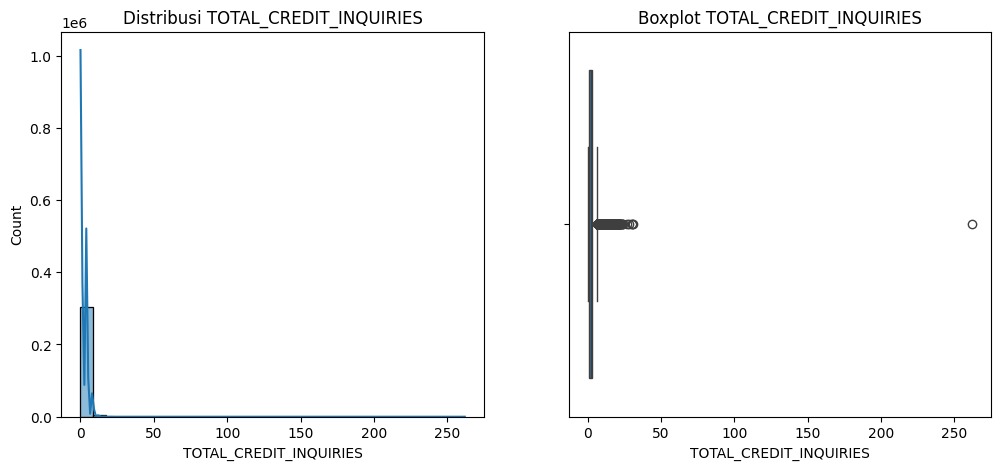

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_binning(df, feature):
    print(df[feature].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]))

    plt.figure(figsize=(12,5))

    # Histogram untuk melihat distribusi data
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribusi {feature}')

    # Boxplot untuk mendeteksi outlier
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot {feature}')

    plt.show()

# Jalankan analisis untuk TOTAL_CREDIT_INQUIRIES
analyze_binning(data2, 'TOTAL_CREDIT_INQUIRIES')

In [ ]:
bins = [0, 1, 2, 3, 5, np.inf]  # Outlier (>5) masuk ke bin terakhir
labels = ["0", "1", "2", "3-5", ">5"]  # Label bin

data3["TOTAL_CREDIT_INQUIRIES_Binned"] = pd.cut(data3["TOTAL_CREDIT_INQUIRIES"], bins=bins, labels=labels, include_lowest=True)

data3["TOTAL_CREDIT_INQUIRIES_Binned"].value_counts()

,count
TOTAL_CREDIT_INQUIRIES_Binned,
0,146344
1,51559
3-5,44489
2,39380
>5,25739


In [ ]:
woe(data3, 'TOTAL_CREDIT_INQUIRIES_Binned')

,TOTAL_CREDIT_INQUIRIES_Binned,num_observation,good_loan_prob,grade_proportion,num_good_loan,num_bad_loan,good_loan_prop,bad_loan_prop,weight_of_evidence,good_loan_prop_diff,diff_woe,information_value
0,>5,25739,0.084191,0.083701,2154.381863,23584.618137,0.023437,0.109397,-1.540679,NaN,NaN,0.724708
1,2,39380,0.077095,0.128060,5043.020900,34336.979100,0.054861,0.159272,-1.065805,0.031424,0.474873,0.724708
2,3-5,44489,0.081031,0.144674,6436.423806,38052.576194,0.070019,0.176506,-0.924584,0.015158,0.141222,0.724708
3,1,51559,0.077057,0.167666,8644.667934,42914.332066,0.094042,0.199057,-0.749851,0.024023,0.174733,0.724708
4,0,146344,0.082299,0.475898,69644.878837,76699.121163,0.757641,0.355768,0.755931,0.663598,1.505782,0.724708


### Non Binned Features

In [ ]:
import pandas as pd

filtered_features = [col for col in numeric if col not in selected_features]
filtered_features = pd.Index(filtered_features)

print(filtered_features)

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')


In [ ]:
for feature in filtered_features:
    woe(data3, feature)

## ONE-HOT ENCODING

In [ ]:
feature_selected

['AMT_CREDIT_Binned',
 'CNT_CHILDREN_Binned',
 'AMT_INCOME_TOTAL_Binned',
 'AMT_ANNUITY_Binned',
 'AMT_GOODS_PRICE_Binned',
 'REGION_POPULATION_RELATIVE_Binned',
 'CNT_FAM_MEMBERS_Binned',
 'HOUR_APPR_PROCESS_START_Binned',
 'EXT_SOURCE_2_Binned',
 'EXT_SOURCE_3_Binned',
 'OBS_30_CNT_SOCIAL_CIRCLE_Binned',
 'OBS_60_CNT_SOCIAL_CIRCLE_Binned',
 'AGE_Binned',
 'YEAR_EMP_Binned',
 'YEAR_REGISTERED_Binned',
 'YEAR_PUBLISHED_Binned',
 'YEAR_LAST_PHONE_CHANGE_Binned',
 'TOTAL_CREDIT_INQUIRIES_Binned',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_PHONE',
 'FLAG_DOCUMENT_3']

In [ ]:
one_hot_data = data3[feature_selected]

In [ ]:
one_hot_data.head()

,AMT_CREDIT_Binned,CNT_CHILDREN_Binned,AMT_INCOME_TOTAL_Binned,AMT_ANNUITY_Binned,AMT_GOODS_PRICE_Binned,REGION_POPULATION_RELATIVE_Binned,CNT_FAM_MEMBERS_Binned,HOUR_APPR_PROCESS_START_Binned,EXT_SOURCE_2_Binned,EXT_SOURCE_3_Binned,...,YEAR_EMP_Binned,YEAR_REGISTERED_Binned,YEAR_PUBLISHED_Binned,YEAR_LAST_PHONE_CHANGE_Binned,TOTAL_CREDIT_INQUIRIES_Binned,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_DOCUMENT_3
0,400k-600k,No Child,200k-250k,30k,600k,"(0.0183, 0.0364]",>6,"(5.75, 11.5]","(0.214, 0.427]","(-0.000368, 0.18]",...,0-2 yoe,4-10 years,4-8 years,2-4 years,0,1,0,1,1,1
1,>1m,No Child,250k-300k,46k,1m,"(0.000218, 0.0183]",2,"(5.75, 11.5]","(0.427, 0.641]","(0.359, 0.538]",...,2-4 yoe,2-4 years,0-4 years,0-2 years,0,0,0,0,1,1
2,0-200k,No Child,0-100k,20k,300k,"(0.000218, 0.0183]",>6,"(5.75, 11.5]","(0.427, 0.641]","(0.717, 0.896]",...,0-2 yoe,10-15 years,4-8 years,0-2 years,0,1,1,1,1,0
3,200k-400k,No Child,100k-150k,30k,300k,"(0.000218, 0.0183]",2,"(11.5, 17.25]","(0.641, 0.855]","(0.359, 0.538]",...,6-8 yoe,20-30 years,4-8 years,0-2 years,0,0,0,1,0,1
4,400k-600k,No Child,100k-150k,30k,600k,"(0.0183, 0.0364]",>6,"(5.75, 11.5]","(0.214, 0.427]","(0.359, 0.538]",...,6-8 yoe,10-15 years,8-12 years,2-4 years,0,1,0,1,0,0


In [ ]:
map = {}
for feature in feature_selected:
    map[feature] = len(data3[feature].unique())

map

{'AMT_CREDIT_Binned': 6,
 'CNT_CHILDREN_Binned': 6,
 'AMT_INCOME_TOTAL_Binned': 6,
 'AMT_ANNUITY_Binned': 4,
 'AMT_GOODS_PRICE_Binned': 4,
 'REGION_POPULATION_RELATIVE_Binned': 4,
 'CNT_FAM_MEMBERS_Binned': 4,
 'HOUR_APPR_PROCESS_START_Binned': 4,
 'EXT_SOURCE_2_Binned': 4,
 'EXT_SOURCE_3_Binned': 5,
 'OBS_30_CNT_SOCIAL_CIRCLE_Binned': 3,
 'OBS_60_CNT_SOCIAL_CIRCLE_Binned': 3,
 'AGE_Binned': 5,
 'YEAR_EMP_Binned': 7,
 'YEAR_REGISTERED_Binned': 7,
 'YEAR_PUBLISHED_Binned': 4,
 'YEAR_LAST_PHONE_CHANGE_Binned': 4,
 'TOTAL_CREDIT_INQUIRIES_Binned': 5,
 'CODE_GENDER': 2,
 'FLAG_OWN_CAR': 2,
 'FLAG_OWN_REALTY': 2,
 'FLAG_PHONE': 2,
 'FLAG_DOCUMENT_3': 2}

In [ ]:
features_to_encode = [col for col in feature_selected if 'Binned' in col]
binary_features = [col for col in feature_selected if col not in features_to_encode]

one_hot_encoded = pd.get_dummies(data3[features_to_encode], prefix=features_to_encode, dtype=int)

final_data = pd.concat([data3[binary_features], one_hot_encoded], axis=1)

final_data = final_data.astype(int)

final_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_DOCUMENT_3,AMT_CREDIT_Binned_0-200k,AMT_CREDIT_Binned_200k-400k,AMT_CREDIT_Binned_400k-600k,AMT_CREDIT_Binned_600k-800k,AMT_CREDIT_Binned_800k-1m,...,YEAR_PUBLISHED_Binned_>12 years,YEAR_LAST_PHONE_CHANGE_Binned_0-2 years,YEAR_LAST_PHONE_CHANGE_Binned_2-4 years,YEAR_LAST_PHONE_CHANGE_Binned_4-6 years,YEAR_LAST_PHONE_CHANGE_Binned_>6 years,TOTAL_CREDIT_INQUIRIES_Binned_0,TOTAL_CREDIT_INQUIRIES_Binned_1,TOTAL_CREDIT_INQUIRIES_Binned_2,TOTAL_CREDIT_INQUIRIES_Binned_3-5,TOTAL_CREDIT_INQUIRIES_Binned_>5
0,1,0,1,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,1,1,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


# Concat Data

In [ ]:
final_data = pd.concat([data3[binary_features], one_hot_encoded, data3['TARGET']], axis=1)
final_data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_DOCUMENT_3,AMT_CREDIT_Binned_0-200k,AMT_CREDIT_Binned_200k-400k,AMT_CREDIT_Binned_400k-600k,AMT_CREDIT_Binned_600k-800k,AMT_CREDIT_Binned_800k-1m,...,YEAR_LAST_PHONE_CHANGE_Binned_0-2 years,YEAR_LAST_PHONE_CHANGE_Binned_2-4 years,YEAR_LAST_PHONE_CHANGE_Binned_4-6 years,YEAR_LAST_PHONE_CHANGE_Binned_>6 years,TOTAL_CREDIT_INQUIRIES_Binned_0,TOTAL_CREDIT_INQUIRIES_Binned_1,TOTAL_CREDIT_INQUIRIES_Binned_2,TOTAL_CREDIT_INQUIRIES_Binned_3-5,TOTAL_CREDIT_INQUIRIES_Binned_>5,TARGET
0,1,0,1,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,1,1,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
print(f"TARGET 1: {(final_data['TARGET'] == 1).sum()}")
print(f"TARGET 0: {(final_data['TARGET'] == 0).sum()}")

TARGET 1: 24825
TARGET 0: 282686


# Train Test Split

In [ ]:
import pandas as pd

final_data = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/final_data.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X = final_data.drop(columns=['TARGET'])
y = final_data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modeling

## Logistic Regression Imbalance

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np

def randomized_search_logreg(X_train, y_train):
    param = [
        {'penalty': ['l1', 'l2'], 'C': np.linspace(0.01, 1, 75), 'solver': ['liblinear']},
        {'penalty': ['elasticnet'], 'C': np.linspace(0.01, 1, 75), 'solver': ['saga'], 'l1_ratio': np.linspace(0.1, 0.9, 5)}
    ]

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
    lr = LogisticRegression(max_iter=500)

    lr_clf = RandomizedSearchCV(
        lr,
        param,
        scoring='roc_auc',
        cv=skf,
        refit=True,
        n_iter=10,
        random_state=42,
        n_jobs=-1
    )


    search_lr = lr_clf.fit(X_train, y_train)

    print("Best Hyperparameters:", search_lr.best_params_)
    return search_lr.best_estimator_

In [ ]:
best_model = randomized_search_logreg(X_train, y_train)

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(0.5317567567567568)}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("🔹 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\n🔹 Classification Report:")
    print(classification_report(y_test, y_pred))

    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"\n🔹 ROC AUC Score: {auc_score:.4f}")

evaluate_model(best_model, X_test, y_test)

🔹 Confusion Matrix:
[[56508    30]
 [ 4941    24]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.44      0.00      0.01      4965

    accuracy                           0.92     61503
   macro avg       0.68      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503


🔹 ROC AUC Score: 0.7335


## Logistic Regression SMOTE

Model sebelumnya dibuat sebelum melakukan balancing data

In [ ]:
print("Distribusi Kelas di y_train:")
print(y_train.value_counts())

print("\nDistribusi Kelas di y_test:")
print(y_test.value_counts())

Distribusi Kelas di y_train:
TARGET
0    226148
1     19860
Name: count, dtype: int64

Distribusi Kelas di y_test:
TARGET
0    56538
1     4965
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribusi Kelas setelah SMOTE:")
print(y_train_resampled.value_counts())

Distribusi Kelas setelah SMOTE:
TARGET
0    226148
1    226148
Name: count, dtype: int64


In [ ]:
best_model_blc = randomized_search_logreg(X_train_resampled, y_train_resampled)

Best Hyperparameters: {'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': np.float64(0.9), 'C': np.float64(1.0)}


In [ ]:
evaluate_model(best_model_blc, X_test, y_test)

🔹 Confusion Matrix:
[[56507    31]
 [ 4941    24]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.44      0.00      0.01      4965

    accuracy                           0.92     61503
   macro avg       0.68      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503


🔹 ROC AUC Score: 0.7334


## Logistic Regression Undersampling (choosen)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

print("Distribusi Kelas setelah Undersampling:")
print(y_train_resampled.value_counts())

Distribusi Kelas setelah Undersampling:
TARGET
0    19860
1    19860
Name: count, dtype: int64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np

def randomized_search_logreg(X_train, y_train):
    param = [
        {'penalty': ['l1', 'l2'], 'C': np.linspace(0.01, 1, 75), 'solver': ['liblinear']},
        {'penalty': ['elasticnet'], 'C': np.linspace(0.01, 1, 75), 'solver': ['saga'], 'l1_ratio': np.linspace(0.1, 0.9, 5)}
    ]

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)
    lr = LogisticRegression(max_iter=500)

    lr_clf = RandomizedSearchCV(
        lr,
        param,
        scoring='roc_auc',
        cv=skf,
        refit=True,
        n_iter=10,
        random_state=42,
        n_jobs=-1
    )


    search_lr = lr_clf.fit(X_train, y_train)

    print("Best Hyperparameters:", search_lr.best_params_)
    return search_lr.best_estimator_

best_model_logreg_undersampled = randomized_search_logreg(X_train_resampled, y_train_resampled)

Best Hyperparameters: {'solver': 'saga', 'penalty': 'elasticnet', 'l1_ratio': np.float64(0.9), 'C': np.float64(0.09027027027027026)}


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    y_pred_proba = model.predict_proba(X_test)[:, 1]

    print("🔹 Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\n🔹 Classification Report:")
    print(classification_report(y_test, y_pred))

    auc_score = roc_auc_score(y_test, y_pred_proba)
    print(f"\n🔹 ROC AUC Score: {auc_score:.4f}")

evaluate_model(best_model_logreg_undersampled, X_test, y_test)

🔹 Confusion Matrix:
[[38461 18077]
 [ 1638  3327]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56538
           1       0.16      0.67      0.25      4965

    accuracy                           0.68     61503
   macro avg       0.56      0.68      0.52     61503
weighted avg       0.89      0.68      0.75     61503


🔹 ROC AUC Score: 0.7335


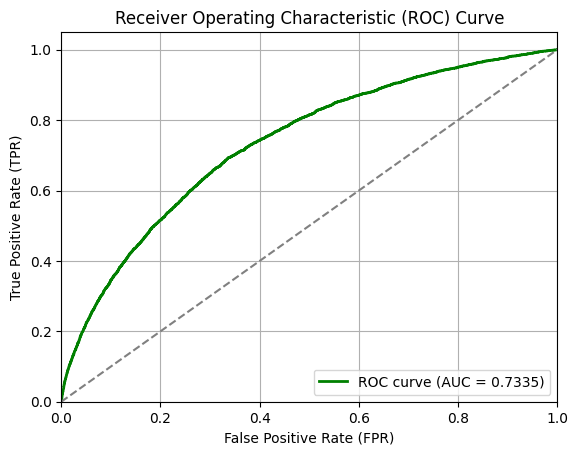

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_auc(model, X_test, y_test):
    y_probs = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_roc_auc(best_model_logreg_undersampled, X_test, y_test)

## XGBOOST

In [ ]:
import xgboost as xgb

### Rename Feature

xgboost hanya bisa menerima nama kolom yang tidak mengandung unsur unik

In [ ]:
if isinstance(X_train_resampled, pd.DataFrame):
    print(X_train_resampled.columns)
else:
    print("X_train_resampled bukan DataFrame!")

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE',
       'FLAG_DOCUMENT_3', 'AMT_CREDIT_Binned_0-200k',
       'AMT_CREDIT_Binned_200k-400k', 'AMT_CREDIT_Binned_400k-600k',
       'AMT_CREDIT_Binned_600k-800k', 'AMT_CREDIT_Binned_800k-1m',
       'AMT_CREDIT_Binned_>1m', 'CNT_CHILDREN_Binned_No Child',
       'CNT_CHILDREN_Binned_1-2 Children', 'CNT_CHILDREN_Binned_3-4 Children',
       'CNT_CHILDREN_Binned_5-6 Children', 'CNT_CHILDREN_Binned_7-10 Children',
       'CNT_CHILDREN_Binned_More than 10', 'AMT_INCOME_TOTAL_Binned_0-100k',
       'AMT_INCOME_TOTAL_Binned_100k-150k',
       'AMT_INCOME_TOTAL_Binned_150k-200k',
       'AMT_INCOME_TOTAL_Binned_200k-250k',
       'AMT_INCOME_TOTAL_Binned_250k-300k', 'AMT_INCOME_TOTAL_Binned_>300k',
       'AMT_ANNUITY_Binned_20k', 'AMT_ANNUITY_Binned_30k',
       'AMT_ANNUITY_Binned_46k', 'AMT_ANNUITY_Binned_>46k',
       'AMT_GOODS_PRICE_Binned_1m', 'AMT_GOODS_PRICE_Binned_300k',
       'AMT_GOODS_PRICE_Binned_600k', 'AMT_G

In [ ]:
X_train_resampled.columns = X_train_resampled.columns.str.replace(r"[\[\](),>]", "_", regex=True)
X_test.columns = X_test.columns.str.replace(r"[\[\](),>]", "_", regex=True)

### Modeling XGBOOST

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from xgboost import XGBClassifier

def randomized_search_xgb(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 300, 500],
        'max_depth': [3, 5, 7],
        'learning_rate': np.linspace(0.01, 0.3, 5),
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.01, 0.1],
        'reg_lambda': [1, 1.5, 2]
    }

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

    xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    xgb_clf = RandomizedSearchCV(
        xgb,
        param_grid,
        scoring='roc_auc',
        cv=skf,
        refit=True,
        n_iter=20,
        random_state=42,
        n_jobs=-1
    )

    search_xgb = xgb_clf.fit(X_train, y_train)

    print("Best Hyperparameters:", search_xgb.best_params_)
    return search_xgb.best_estimator_

In [ ]:
best_xgb_model = randomized_search_xgb(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:46:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': np.float64(0.08249999999999999), 'gamma': 0, 'colsample_bytree': 0.8}


In [ ]:
evaluate_model(best_xgb_model, X_test, y_test)

🔹 Confusion Matrix:
[[38219 18319]
 [ 1649  3316]]

🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     56538
           1       0.15      0.67      0.25      4965

    accuracy                           0.68     61503
   macro avg       0.56      0.67      0.52     61503
weighted avg       0.89      0.68      0.75     61503


🔹 ROC AUC Score: 0.7329


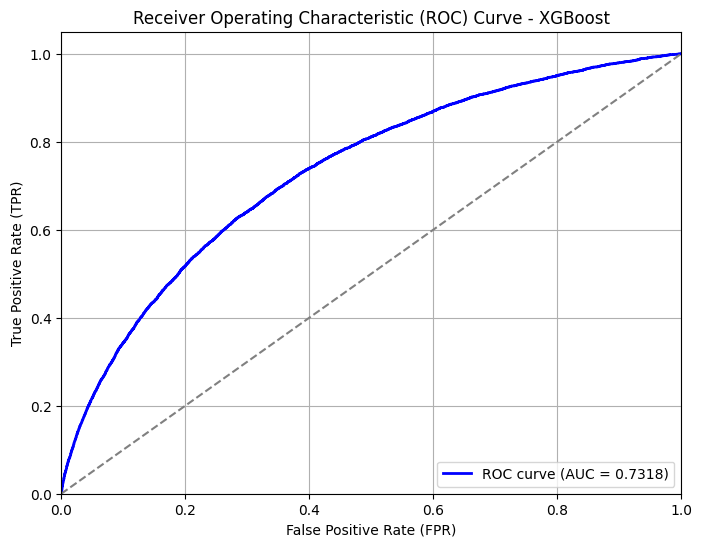

In [ ]:
def plot_roc_auc(model, X_test, y_test):
    y_probs = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

plot_roc_auc(best_xgb_model, X_test, y_test)

# Evaluation

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_metrics(accuracy, precision, recall, f1_score, auc_score):
    metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]
    values = [accuracy, precision, recall, f1_score, auc_score]

    plt.figure(figsize=(6, 4))
    plt.barh(metrics, values, color=["blue", "green", "red", "purple", "orange"])
    plt.xlim(0, 1)
    plt.xlabel("Score")
    plt.title("Model Performance Metrics")

    for index, value in enumerate(values):
        plt.text(value + 0.02, index, f"{value:.2f}", va="center")

    plt.show()

In [ ]:
def plot_manual_conf_matrix(tp, fp, fn, tn):
    cm = np.array([[tn, fp], [fn, tp]])
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

### Logistic Regression Imbalance

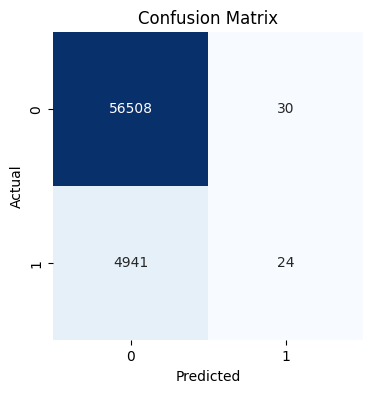

In [ ]:
plot_manual_conf_matrix(24, 30, 4941, 56508)

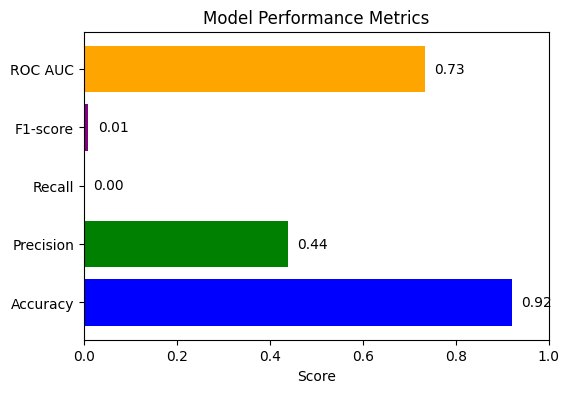

In [ ]:
# untuk kelas 1
plot_metrics(0.92, 0.44, 0, 0.01, 0.7335)

### Logistic Regression SMOTE

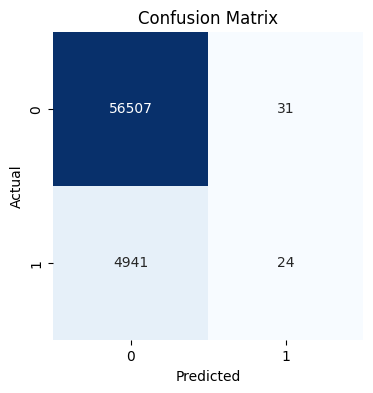

In [ ]:
plot_manual_conf_matrix(24, 31, 4941, 56507)

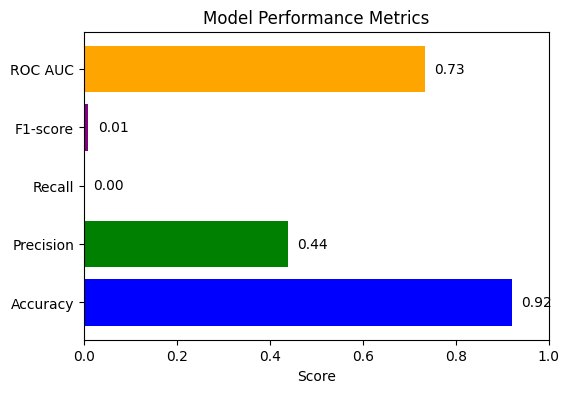

In [ ]:
plot_metrics(0.92, 0.44, 0.00, 0.01, 0.7334)

### Logistic Regression Undersampling

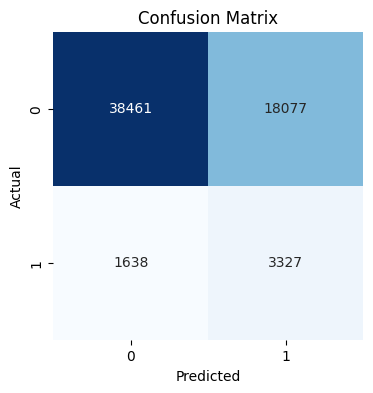

In [ ]:
plot_manual_conf_matrix(3327, 18077, 1638, 38461)

### XGBOOST

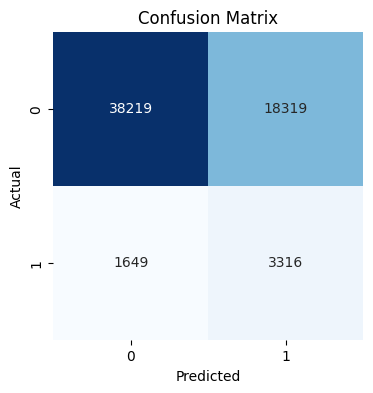

In [ ]:
plot_manual_conf_matrix(3316, 18319, 1649, 38219)

# Feature Importance

                                   Feature  Importance
47   EXT_SOURCE_3_Binned_(-0.000368, 0.18]    1.002454
51      EXT_SOURCE_3_Binned_(0.717, 0.896]    0.781600
43  EXT_SOURCE_2_Binned_(-0.000855, 0.214]    0.690879
46      EXT_SOURCE_2_Binned_(0.641, 0.855]    0.682234
50      EXT_SOURCE_3_Binned_(0.538, 0.717]    0.493158
48       EXT_SOURCE_3_Binned_(0.18, 0.359]    0.478619
0                              CODE_GENDER    0.453236
27               AMT_GOODS_PRICE_Binned_1m    0.343159
1                             FLAG_OWN_CAR    0.307830
64               YEAR_EMP_Binned_15-30 yoe    0.290470


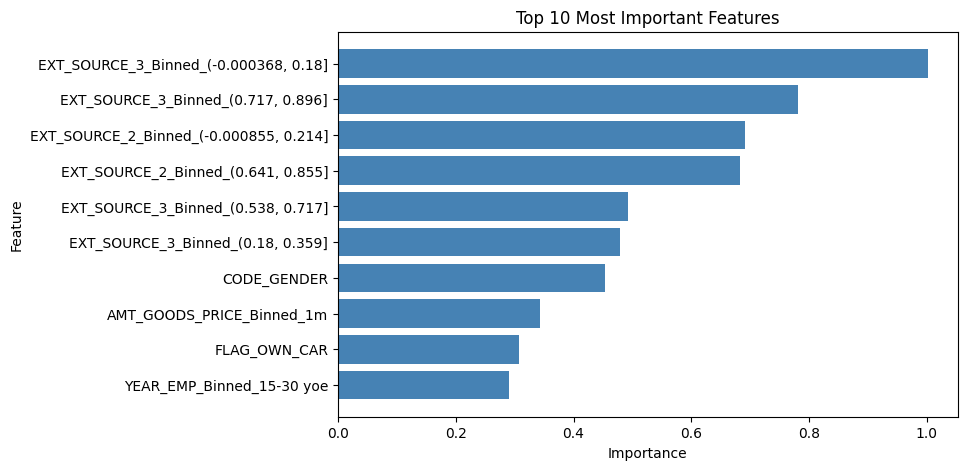

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

feature_importance = np.abs(best_model_logreg_undersampled.coef_).flatten()

feature_importance_df = pd.DataFrame({'Feature': final_data.columns.drop('TARGET'),
                                      'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df.head(10))

plt.figure(figsize=(8,5))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10], color='steelblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features")
plt.gca().invert_yaxis()
plt.show()

# Implementation (Predict New Dataset)

## Pre Process New Data

In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/home-credit-default-risk/application_test.csv')

In [ ]:
def auto_preprocessing (data_test):

  # Handling missing values
  numeric = data_test.select_dtypes(include='number').columns
  category = data_test.select_dtypes(include='object').columns

  data_test[numeric] = data_test[numeric].apply(lambda x: x.fillna(x.median()))
  data_test[category] = data_test[category].apply(lambda x: x.fillna(x.mode()[0]))

  data = data_test.copy()

  #Feature Engineering
  data['AGE'] = round((data['DAYS_BIRTH'] / 365).abs(), 0).astype(int)
  data['YEAR_EMP'] = round((data['DAYS_EMPLOYED'] / 365).abs(), 0).astype(int)
  data['YEAR_REGISTERED'] = round((data['DAYS_REGISTRATION'] / 365).abs(), 0).astype(int)
  data['YEAR_PUBLISHED'] = round((data['DAYS_ID_PUBLISH'] / 365).abs(), 0).astype(int)
  data['YEAR_LAST_PHONE_CHANGE'] = round((data['DAYS_LAST_PHONE_CHANGE'] / 365).abs(), 0).astype(int)

  data['TOTAL_CREDIT_INQUIRIES'] = (
      data['AMT_REQ_CREDIT_BUREAU_HOUR'] +
      data['AMT_REQ_CREDIT_BUREAU_DAY'] +
      data['AMT_REQ_CREDIT_BUREAU_WEEK'] +
      data['AMT_REQ_CREDIT_BUREAU_MON'] +
      data['AMT_REQ_CREDIT_BUREAU_QRT'] +
      data['AMT_REQ_CREDIT_BUREAU_YEAR']
  )

  data = data.drop([
      'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
      'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
      'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
  ], axis=1)

  # Encoding
  data['CODE_GENDER'] = data['CODE_GENDER'].map({'F':0, 'M':1,'XNA':0})
  data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].map({'N':0, 'Y':1})
  data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].map({'N':0, 'Y':1})

  # num cat
  category = data.select_dtypes(include='object').columns
  numeric = data.select_dtypes(include='number').columns

  # bining
  # AMT_CREDIT_BINNED
  data['AMT_CREDIT_Binned'] = np.where((data['AMT_CREDIT']>0)&(data['AMT_CREDIT']<200000),'0-200k',
                      np.where((data['AMT_CREDIT']>200000)&(data['AMT_CREDIT']<=400000),'200k-400k',
                      np.where((data['AMT_CREDIT']>400000)&(data['AMT_CREDIT']<=600000),'400k-600k',
                      np.where((data['AMT_CREDIT']>600000)&(data['AMT_CREDIT']<=800000),'600k-800k',
                      np.where((data['AMT_CREDIT']>800000)&(data['AMT_CREDIT']<=1000000),'800k-1m','>1m')))))

  data['AMT_CREDIT_Binned'].value_counts()

  # CNT_CHILDREN
  bins = [-1, 0, 2, 4, 6, 10, 20]
  labels = ['No Child', '1-2 Children', '3-4 Children', '5-6 Children', '7-10 Children', 'More than 10']
  data['CNT_CHILDREN_Binned'] = pd.cut(data['CNT_CHILDREN'], bins=bins, labels=labels)

  # AMT_INCOME_TOTAL
  data['AMT_INCOME_TOTAL_Binned'] = np.where((data['AMT_INCOME_TOTAL'] > 0)&(data['AMT_INCOME_TOTAL'] <= 100000),'0-100k',
                               np.where((data['AMT_INCOME_TOTAL'] > 100000)&(data['AMT_INCOME_TOTAL'] <= 150000), '100k-150k',
                               np.where((data['AMT_INCOME_TOTAL'] > 150000)&(data['AMT_INCOME_TOTAL'] <= 200000), '150k-200k',
                               np.where((data['AMT_INCOME_TOTAL'] > 200000)&(data['AMT_INCOME_TOTAL'] <= 250000), '200k-250k',
                               np.where((data['AMT_INCOME_TOTAL'] > 250000)&(data['AMT_INCOME_TOTAL'] <= 300000), '250k-300k','>300k')))))

  # AMT_ANNUITY
  data['AMT_ANNUITY_Binned'] =  np.where(data['AMT_ANNUITY']<=20000,'20k',
                          np.where((data['AMT_ANNUITY']>20000)&(data['AMT_ANNUITY']<=30000),'30k',
                          np.where((data['AMT_ANNUITY']>30000)&(data['AMT_ANNUITY']<=46000),'46k','>46k')))

  # AMT_GOODS_PRICE
  data['AMT_GOODS_PRICE_Binned'] = np.where(data['AMT_GOODS_PRICE']<=300000,'300k',
                              np.where((data['AMT_GOODS_PRICE']>300000)&(data['AMT_GOODS_PRICE']<=600000),'600k',
                              np.where((data['AMT_GOODS_PRICE']>600000)&(data['AMT_GOODS_PRICE']<=900000),'900k','1m')))

  # REGION_POPULATION_RELATIVE
  data['REGION_POPULATION_RELATIVE_Binned'] = pd.cut(
      data['REGION_POPULATION_RELATIVE'],
      bins=[0.000218, 0.0183, 0.0364, 0.0545, 0.0725],
      right=True)

  # CNT_FAM_MEMBERS
  data['CNT_FAM_MEMBERS_Binned'] = np.where(data['CNT_FAM_MEMBERS'] == 2, '2',
                              np.where((data['CNT_FAM_MEMBERS']>2)&(data['CNT_FAM_MEMBERS']<=4),'2-4',
                              np.where((data['CNT_FAM_MEMBERS']>4)&(data['CNT_FAM_MEMBERS']<=6),'4-6','>6')))

  # HOUR_APPR_PROCESS_START
  data['HOUR_APPR_PROCESS_START_Binned'] = pd.cut(
      data['HOUR_APPR_PROCESS_START'],
      bins=[-0.023, 5.75, 11.5, 17.25, 23.0],
      right=True)

  # EXT_SOURCE_2
  data['EXT_SOURCE_2_Binned'] = pd.cut(
      data['EXT_SOURCE_2'],
      bins=[-0.000855, 0.214, 0.427, 0.641, 0.855],
      right=True)

  # EXT_SOURCE_3
  data['EXT_SOURCE_3_Binned'] = pd.cut(
      data['EXT_SOURCE_3'],
      bins=[-0.000368, 0.18, 0.359, 0.538, 0.717, 0.896],
      right=True)

  # OBS_30_CNT_SOCIAL_CIRCLE
  data['OBS_30_CNT_SOCIAL_CIRCLE_Binned'] = np.where(data['OBS_30_CNT_SOCIAL_CIRCLE']==0,'0',
                                       np.where((data['OBS_30_CNT_SOCIAL_CIRCLE']>0)&(data['OBS_30_CNT_SOCIAL_CIRCLE']<4),'1-4','>4'))

  # DEF_30_CNT_SOCIAL_CIRCLE
  data['DEF_30_CNT_SOCIAL_CIRCLE_Binned'] = np.where(data['DEF_30_CNT_SOCIAL_CIRCLE'] == 0, '0',
                                       np.where(data['DEF_30_CNT_SOCIAL_CIRCLE'] == 1, '1', '>1'))

  # OBS_60_CNT_SOCIAL_CIRCLE
  data['OBS_60_CNT_SOCIAL_CIRCLE_Binned'] = np.where(data['OBS_60_CNT_SOCIAL_CIRCLE'] == 0, '0',
                                       np.where(data['OBS_60_CNT_SOCIAL_CIRCLE'] == 1, '1', '>1'))

  # DEF_60_CNT_SOCIAL_CIRCLE
  data['DEF_60_CNT_SOCIAL_CIRCLE_Binned'] = np.where(data['DEF_60_CNT_SOCIAL_CIRCLE'] == 0, '0',
                                       np.where(data['DEF_60_CNT_SOCIAL_CIRCLE'] == 1, '1', '>1'))

  # AGE
  data['AGE_Binned'] = np.where((data['AGE']>20)&(data['AGE']<=30),'20-30yo',
                  np.where((data['AGE']>30)&(data['AGE']<=40),'30-40yo',
                  np.where((data['AGE']>40)&(data['AGE']<=50),'40-50yo',
                  np.where((data['AGE']>50)&(data['AGE']<=60),'50-60yo','>60yo'))))

  # YEAR_EMP
  data['YEAR_EMP_Binned'] = np.where((data['YEAR_EMP']>0)&(data['YEAR_EMP']<=2), '0-2 yoe',
                       np.where((data['YEAR_EMP']>2)&(data['YEAR_EMP']<=4), '2-4 yoe',
                       np.where((data['YEAR_EMP']>4)&(data['YEAR_EMP']<=6), '4-6 yoe',
                       np.where((data['YEAR_EMP']>6)&(data['YEAR_EMP']<=8), '6-8 yoe',
                       np.where((data['YEAR_EMP']>8)&(data['YEAR_EMP']<=15),'8-15 yoe',
                       np.where((data['YEAR_EMP']>15)&(data['YEAR_EMP']<=30),'15-30 yoe', '>30 yoe'))))))

  # YEAR_REGISTERED
  data['YEAR_REGISTERED_Binned'] = np.where((data['YEAR_REGISTERED']>0)&(data['YEAR_REGISTERED']<=2),'0-2 years',
                              np.where((data['YEAR_REGISTERED']>2)&(data['YEAR_REGISTERED']<=4),'2-4 years',
                              np.where((data['YEAR_REGISTERED']>4)&(data['YEAR_REGISTERED']<=10),'4-10 years',
                              np.where((data['YEAR_REGISTERED']>10)&(data['YEAR_REGISTERED']<=15),'10-15 years',
                              np.where((data['YEAR_REGISTERED']>15)&(data['YEAR_REGISTERED']<=20),'15-20 years',
                              np.where((data['YEAR_REGISTERED']>20)&(data['YEAR_REGISTERED']<=30),'20-30 years', '>30 years'))))))

  # YEAR_PUBLISHED
  data['YEAR_PUBLISHED_Binned'] = np.where((data['YEAR_PUBLISHED']>0)&(data['YEAR_PUBLISHED']<=4),'0-4 years',
                             np.where((data['YEAR_PUBLISHED']>4)&(data['YEAR_PUBLISHED']<=8),'4-8 years',
                             np.where((data['YEAR_PUBLISHED']>8)&(data['YEAR_PUBLISHED']<=12),'8-12 years',
                             '>12 years')))

  # YEAR_LAST_PHONE_CHANGE
  data['YEAR_LAST_PHONE_CHANGE_Binned'] = np.where((data['YEAR_LAST_PHONE_CHANGE']>0)&(data['YEAR_LAST_PHONE_CHANGE']<=2),'0-2 years',
                                     np.where((data['YEAR_LAST_PHONE_CHANGE']>2)&(data['YEAR_LAST_PHONE_CHANGE']<=4),'2-4 years',
                                     np.where((data['YEAR_LAST_PHONE_CHANGE']>4)&(data['YEAR_LAST_PHONE_CHANGE']<=6),'4-6 years','>6 years')))

  # TOTAL_CREDIT_INQUIRIES
  bins = [0, 1, 2, 3, 5, np.inf]
  labels = ["0", "1", "2", "3-5", ">5"]
  data["TOTAL_CREDIT_INQUIRIES_Binned"] = pd.cut(data["TOTAL_CREDIT_INQUIRIES"], bins=bins, labels=labels, include_lowest=True)

  # Feature selected
  feature_selected = ['AMT_CREDIT_Binned',
                      'CNT_CHILDREN_Binned',
                      'AMT_INCOME_TOTAL_Binned',
                      'AMT_ANNUITY_Binned',
                      'AMT_GOODS_PRICE_Binned',
                      'REGION_POPULATION_RELATIVE_Binned',
                      'CNT_FAM_MEMBERS_Binned',
                      'HOUR_APPR_PROCESS_START_Binned',
                      'EXT_SOURCE_2_Binned',
                      'EXT_SOURCE_3_Binned',
                      'OBS_30_CNT_SOCIAL_CIRCLE_Binned',
                      'OBS_60_CNT_SOCIAL_CIRCLE_Binned',
                      'AGE_Binned',
                      'YEAR_EMP_Binned',
                      'YEAR_REGISTERED_Binned',
                      'YEAR_PUBLISHED_Binned',
                      'YEAR_LAST_PHONE_CHANGE_Binned',
                      'TOTAL_CREDIT_INQUIRIES_Binned',
                      'CODE_GENDER',
                      'FLAG_OWN_CAR',
                      'FLAG_OWN_REALTY',
                      'FLAG_PHONE',
                      'FLAG_DOCUMENT_3']

  # one-hot encoding
  one_hot_data = data[feature_selected]
  features_to_encode = [col for col in feature_selected if 'Binned' in col]
  binary_features = [col for col in feature_selected if col not in features_to_encode]
  one_hot_encoded = pd.get_dummies(data[features_to_encode], prefix=features_to_encode, dtype=int)
  final_data = pd.concat([data[binary_features], one_hot_encoded], axis=1)
  final_data = final_data.astype(int)

  return final_data

In [ ]:
data_test_pred = auto_preprocessing(data_test)

## Predict new data

In [ ]:
predictions = best_model_logreg_undersampled.predict(data_test_pred)

In [ ]:
data_test_result = data_test.copy()

data_test_result['TARGET'] = predictions

In [ ]:
result = data_test_result[['SK_ID_CURR', 'TARGET']]
result.head()

,SK_ID_CURR,TARGET
0,100001,1
1,100005,1
2,100013,0
3,100028,0
4,100038,1


## Downlaod Result

In [ ]:
result.to_csv('result.csv', index=False)

## Analyze Predicted Data

In [ ]:
import pandas as pd

result = pd.read_csv('/content/drive/MyDrive/Home Credit Indonesia/result.csv')

In [ ]:
result.nunique()

,0
SK_ID_CURR,48744
TARGET,2


In [ ]:
count_1 = (result['TARGET'] == 1).sum()
count_0 = (result['TARGET'] == 0).sum()

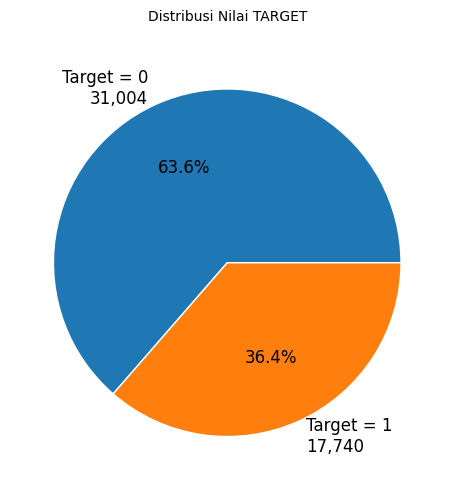

In [ ]:
plt.figure(figsize=(5,5))
plt.pie([count_0, count_1],
        labels=[f'Target = 0\n{count_0:,}', f'Target = 1\n{count_1:,}'],
        autopct='%1.1f%%',
        textprops={'fontsize':12},
        colors=['#1f77b4','#ff7f0e'],
        wedgeprops={'linewidth':1, 'edgecolor':'white'})

plt.title('Distribusi Nilai TARGET\n', fontsize=10)
plt.tight_layout()
plt.show()